In [35]:
import pandas as pd


INPUT_FILE = "Data.csv"        
OUTPUT_FILE = "Data_clean.csv" 

print(" Läser in råfilen...")


df = pd.read_csv(INPUT_FILE, sep="|", engine="python")


df.columns = [c.strip() for c in df.columns]
df = df.apply(lambda x: x.astype(str).str.strip())


df["_timestamp"] = pd.to_datetime(df["_timestamp"], errors="coerce")
df["_ack_timestamp"] = pd.to_datetime(df["_ack_timestamp"], errors="coerce")


df["response_time"] = (df["_ack_timestamp"] - df["_timestamp"]).dt.total_seconds()

df = df.dropna(subset=["response_time"])


df.to_csv(OUTPUT_FILE, index=False)

print(f"✅ Klart! Filen '{OUTPUT_FILE}' skapades med {len(df)} rader.")
print("Kolumner i nya filen:")
print(df.columns.tolist())

# 7️⃣ Visa ett exempel
print("\nFörhandsvisning av de första raderna:")
print(df.head())


 Läser in råfilen...
✅ Klart! Filen 'Data_clean.csv' skapades med 2449 rader.
Kolumner i nya filen:
['_id', '_uuid', '_timestamp', 'rpc', '_ack_timestamp', '_ack_status', 'response_time']

Förhandsvisning av de första raderna:
     _id              _uuid                 _timestamp     rpc  \
1  38103  359404230124464.0 2025-11-11 20:16:26.496259  unlock   
2  38102  359404230124464.0 2025-11-11 20:16:18.751021  unlock   
3  38101  359404230124464.0 2025-11-11 20:16:10.853962  unlock   
4  38100  359404230124464.0 2025-11-11 20:16:02.952613  unlock   
5  38099  359404230124464.0 2025-11-11 20:15:55.081281  unlock   

              _ack_timestamp _ack_status  response_time  
1 2025-11-11 20:16:26.629688         0.0       0.133429  
2 2025-11-11 20:16:18.948793         0.0       0.197772  
3 2025-11-11 20:16:11.029484         0.0       0.175522  
4 2025-11-11 20:16:03.109685         0.0       0.157072  
5 2025-11-11 20:15:55.267968         0.0       0.186687  


C:\Users\sebas\AppData\Local\Temp\ipykernel_17296\1336586647.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["_timestamp"] = pd.to_datetime(df["_timestamp"], errors="coerce")
C:\Users\sebas\AppData\Local\Temp\ipykernel_17296\1336586647.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["_ack_timestamp"] = pd.to_datetime(df["_ack_timestamp"], errors="coerce")


In [12]:
import pandas as pd

df = pd.read_csv("Data_clean.csv")
df["_timestamp"] = pd.to_datetime(df["_timestamp"], errors="coerce")

# Visa vilka datum och tider som finns i datan
print("🗓️ Unika datum i filen:")
print(df["_timestamp"].dt.date.value_counts().sort_index())

print("\n🕒 Exempel på tider per dag:")
print(df["_timestamp"].dt.strftime("%Y-%m-%d %H:%M").value_counts().sort_index().tail(50))


🗓️ Unika datum i filen:
_timestamp
2025-09-11      1
2025-10-17     12
2025-11-03    335
2025-11-04    879
2025-11-05    304
2025-11-06    164
2025-11-10    244
2025-11-11    510
Name: count, dtype: int64

🕒 Exempel på tider per dag:
_timestamp
2025-11-11 13:01    7
2025-11-11 13:02    6
2025-11-11 13:03    5
2025-11-11 13:43    3
2025-11-11 13:44    6
2025-11-11 13:45    7
2025-11-11 13:46    6
2025-11-11 13:47    6
2025-11-11 13:48    7
2025-11-11 13:49    6
2025-11-11 13:50    7
2025-11-11 13:51    6
2025-11-11 13:52    7
2025-11-11 13:53    6
2025-11-11 13:54    6
2025-11-11 13:55    6
2025-11-11 13:56    6
2025-11-11 13:57    6
2025-11-11 13:58    6
2025-11-11 13:59    4
2025-11-11 14:02    7
2025-11-11 14:03    6
2025-11-11 14:04    8
2025-11-11 14:05    7
2025-11-11 14:06    7
2025-11-11 14:07    8
2025-11-11 14:08    7
2025-11-11 14:09    8
2025-11-11 14:10    7
2025-11-11 14:11    7
2025-11-11 14:12    7
2025-11-11 14:13    7
2025-11-11 14:14    7
2025-11-11 14:15    7
2025-11

Inga data hittades för 10:35-10:52 11/10. Söker närmaste data...
Kunde inte hitta data för 10:35-10:52 11/10
Inga data hittades för 11:12-11:27 11/10. Söker närmaste data...
Kunde inte hitta data för 11:12-11:27 11/10
Inga data hittades för 14:44-15:00 11/11. Söker närmaste data...
Kunde inte hitta data för 14:44-15:00 11/11
Inga data hittades för 15:02-15:16 11/11. Söker närmaste data...
Kunde inte hitta data för 15:02-15:16 11/11
Inga data hittades för 21:04-21:16 11/11. Söker närmaste data...
Kunde inte hitta data för 21:04-21:16 11/11

STATISTIK SAMMANFATTNING

--- 13:49-14:04 11/11 ---
Totalt antal förfrågningar: 79
Lyckade förfrågningar: 79
Framgångsrate: 100.00%
Svarstid (medel): 0.3191s
Svarstid (median): 0.1749s
Svarstid (min): 0.1143s
Svarstid (max): 3.1069s
Svarstid (std): 0.5529s


C:\Users\sebas\AppData\Local\Temp\ipykernel_17296\2302711114.py:166: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,1].boxplot(response_data, labels=intervals)


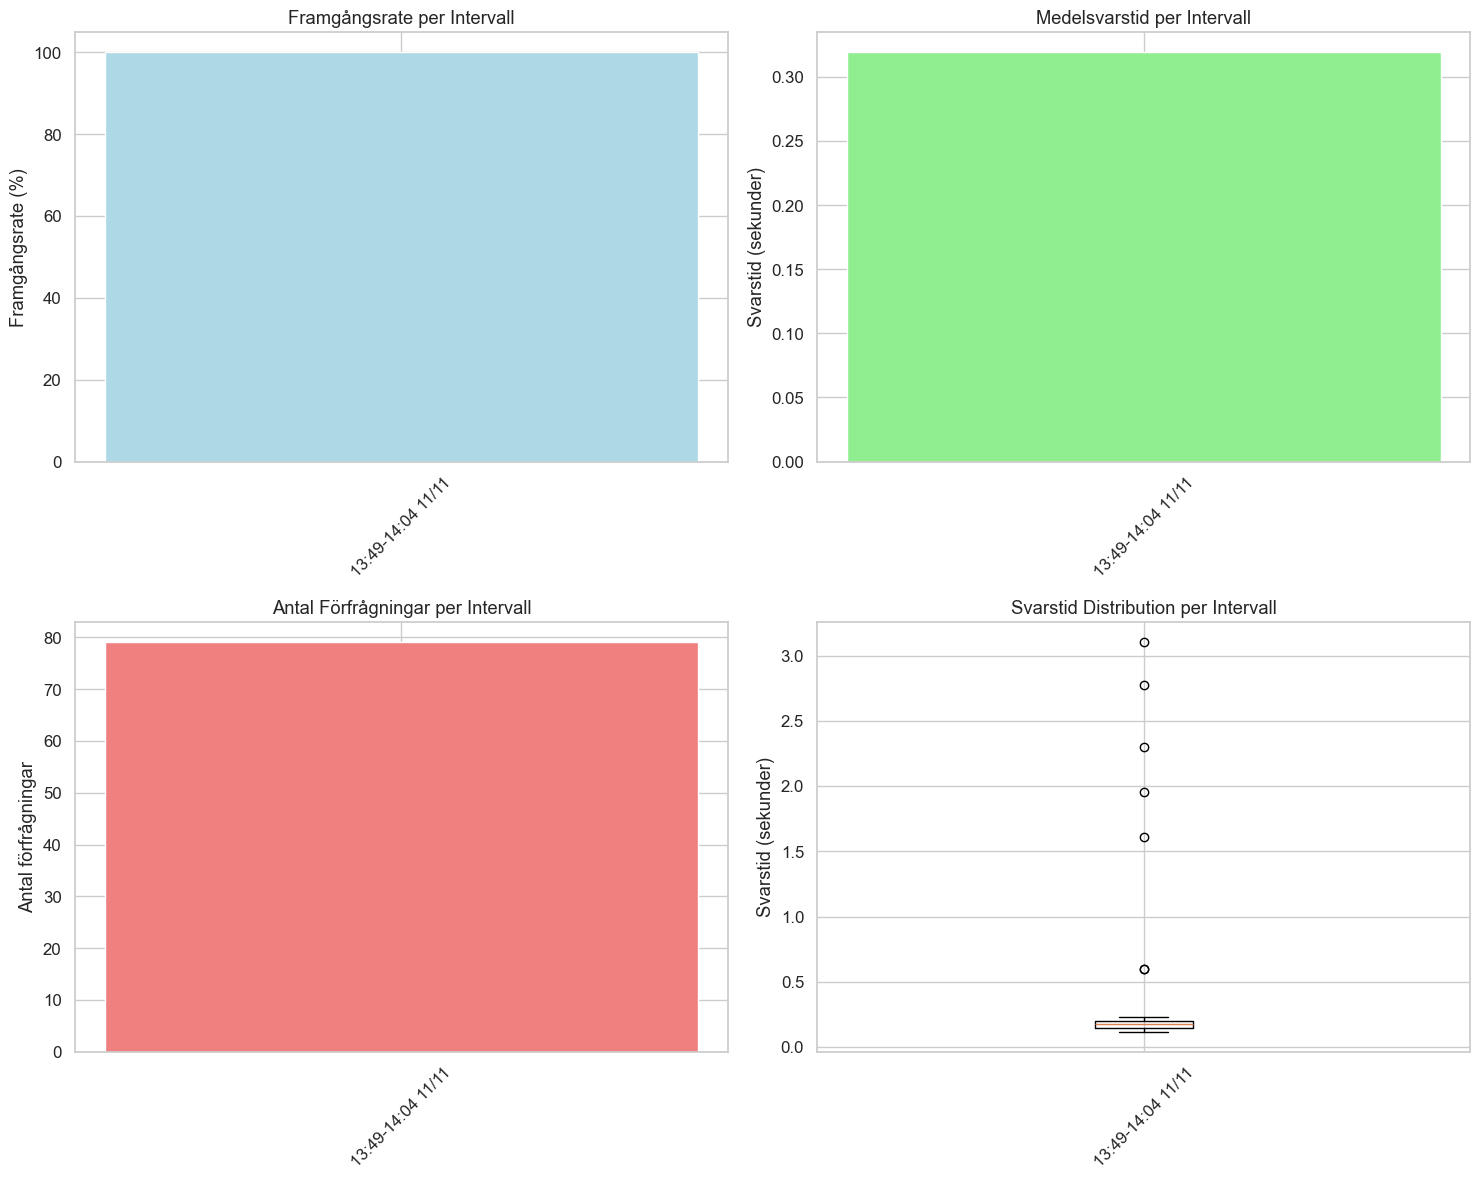

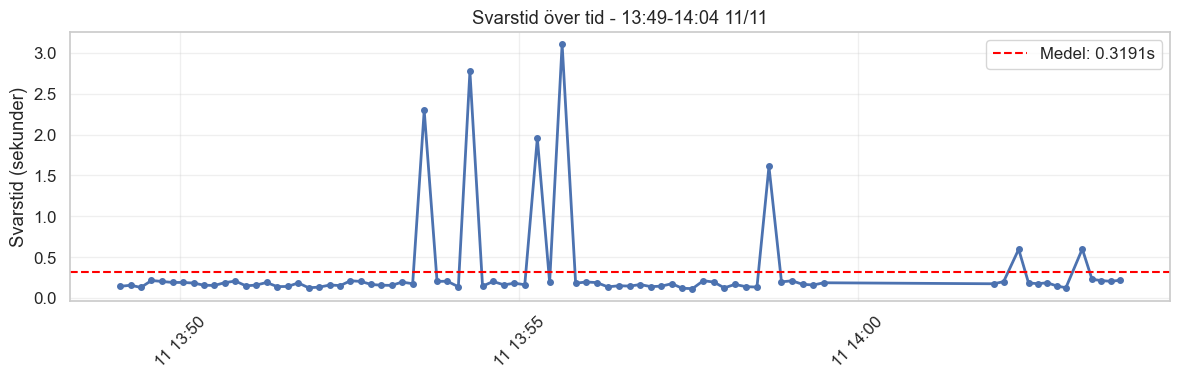


Analys klar! 1 intervall analyserades.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

# Ladda datan
df = pd.read_csv('Data_clean.csv')

# Konvertera tidsstämplar till datetime
df['_timestamp'] = pd.to_datetime(df['_timestamp'])
df['_ack_timestamp'] = pd.to_datetime(df['_ack_timestamp'])

# Definiera tidsintervallen du vill analysera
time_intervals = [
    {
        'name': '10:35-10:52 11/10',
        'start': '2025-11-10 10:35:00',
        'end': '2025-11-10 10:52:00'
    },
    {
        'name': '11:12-11:27 11/10', 
        'start': '2025-11-10 11:12:00',
        'end': '2025-11-10 11:27:00'
    },
    {
        'name': '13:49-14:04 11/11',
        'start': '2025-11-11 13:49:00',
        'end': '2025-11-11 14:04:00'
    },
    {
        'name': '14:44-15:00 11/11',
        'start': '2025-11-11 14:44:00',
        'end': '2025-11-11 15:00:00'
    },
    {
        'name': '15:02-15:16 11/11',
        'start': '2025-11-11 15:02:00',
        'end': '2025-11-11 15:16:00'
    },
    {
        'name': '21:04-21:16 11/11',
        'start': '2025-11-11 21:04:00',
        'end': '2025-11-11 21:16:00'
    }
]

# Funktion för att hitta närmaste tidpunkt om exakt tid inte finns
def find_nearest_data(df, target_time, time_window_minutes=5):
    target = pd.to_datetime(target_time)
    start_time = target - timedelta(minutes=time_window_minutes)
    end_time = target + timedelta(minutes=time_window_minutes)
    
    mask = (df['_timestamp'] >= start_time) & (df['_timestamp'] <= end_time)
    nearest_data = df[mask]
    
    if len(nearest_data) > 0:
        # Returnera den närmaste posten
        nearest_data['time_diff'] = abs(nearest_data['_timestamp'] - target)
        return nearest_data.loc[nearest_data['time_diff'].idxmin()]
    else:
        return None

# Analysera varje intervall
results = []

for interval in time_intervals:
    start_time = pd.to_datetime(interval['start'])
    end_time = pd.to_datetime(interval['end'])
    
    # Filtrera data för intervallet
    mask = (df['_timestamp'] >= start_time) & (df['_timestamp'] <= end_time)
    interval_data = df[mask]
    
    # Om inga data hittades, försök hitta närmaste
    if len(interval_data) == 0:
        print(f"Inga data hittades för {interval['name']}. Söker närmaste data...")
        
        # Hitta närmaste data runt start- och sluttid
        nearest_start = find_nearest_data(df, interval['start'])
        nearest_end = find_nearest_data(df, interval['end'])
        
        if nearest_start is not None and nearest_end is not None:
            actual_start = nearest_start['_timestamp']
            actual_end = nearest_end['_timestamp']
            
            # Uppdatera mask med de faktiska tiderna
            mask = (df['_timestamp'] >= actual_start) & (df['_timestamp'] <= actual_end)
            interval_data = df[mask]
            
            print(f"Använder data från {actual_start} till {actual_end} för {interval['name']}")
        else:
            print(f"Kunde inte hitta data för {interval['name']}")
            continue
    
    # Beräkna statistik
    if len(interval_data) > 0:
        total_requests = len(interval_data)
        successful_requests = len(interval_data[interval_data['_ack_status'] == 0.0])
        success_rate = (successful_requests / total_requests) * 100
        
        response_stats = {
            'mean': interval_data['response_time'].mean(),
            'median': interval_data['response_time'].median(),
            'min': interval_data['response_time'].min(),
            'max': interval_data['response_time'].max(),
            'std': interval_data['response_time'].std()
        }
        
        results.append({
            'interval': interval['name'],
            'total_requests': total_requests,
            'successful_requests': successful_requests,
            'success_rate': success_rate,
            'response_stats': response_stats,
            'data': interval_data
        })

# Skriv ut resultat
print("\n" + "="*80)
print("STATISTIK SAMMANFATTNING")
print("="*80)

for result in results:
    print(f"\n--- {result['interval']} ---")
    print(f"Totalt antal förfrågningar: {result['total_requests']}")
    print(f"Lyckade förfrågningar: {result['successful_requests']}")
    print(f"Framgångsrate: {result['success_rate']:.2f}%")
    print(f"Svarstid (medel): {result['response_stats']['mean']:.4f}s")
    print(f"Svarstid (median): {result['response_stats']['median']:.4f}s")
    print(f"Svarstid (min): {result['response_stats']['min']:.4f}s")
    print(f"Svarstid (max): {result['response_stats']['max']:.4f}s")
    print(f"Svarstid (std): {result['response_stats']['std']:.4f}s")

# Skapa grafer
if results:
    # 1. Jämförelse av framgångsrate mellan intervall
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Framgångsrate
    intervals = [r['interval'] for r in results]
    success_rates = [r['success_rate'] for r in results]
    
    axes[0,0].bar(intervals, success_rates, color='lightblue')
    axes[0,0].set_title('Framgångsrate per Intervall')
    axes[0,0].set_ylabel('Framgångsrate (%)')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Medelsvarstid
    mean_response_times = [r['response_stats']['mean'] for r in results]
    
    axes[0,1].bar(intervals, mean_response_times, color='lightgreen')
    axes[0,1].set_title('Medelsvarstid per Intervall')
    axes[0,1].set_ylabel('Svarstid (sekunder)')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Antal förfrågningar
    total_requests = [r['total_requests'] for r in results]
    
    axes[1,0].bar(intervals, total_requests, color='lightcoral')
    axes[1,0].set_title('Antal Förfrågningar per Intervall')
    axes[1,0].set_ylabel('Antal förfrågningar')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # Boxplot för svarstider
    response_data = [r['data']['response_time'].values for r in results]
    axes[1,1].boxplot(response_data, labels=intervals)
    axes[1,1].set_title('Svarstid Distribution per Intervall')
    axes[1,1].set_ylabel('Svarstid (sekunder)')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # 2. Detaljerade tidsserier för varje intervall
    fig, axes = plt.subplots(len(results), 1, figsize=(12, 4*len(results)))
    
    if len(results) == 1:
        axes = [axes]
    
    for i, result in enumerate(results):
        data = result['data'].sort_values('_timestamp')
        axes[i].plot(data['_timestamp'], data['response_time'], 
                   marker='o', linewidth=2, markersize=4)
        axes[i].set_title(f'Svarstid över tid - {result["interval"]}')
        axes[i].set_ylabel('Svarstid (sekunder)')
        axes[i].grid(True, alpha=0.3)
        
        # Lägg till medellinje
        mean_rt = result['response_stats']['mean']
        axes[i].axhline(y=mean_rt, color='red', linestyle='--', 
                       label=f'Medel: {mean_rt:.4f}s')
        axes[i].legend()
        
        # Rotera x-labels för bättre läsbarhet
        plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # 3. Heatmap av svarstider (om tillräckligt med data)
    if len(results) > 1:
        plt.figure(figsize=(12, 8))
        
        # Skapa en dataframe för heatmap
        heatmap_data = []
        for result in results:
            heatmap_data.append(result['data']['response_time'].values)
        
        # Fyll med NaN för att göra arrayen rektangulär
        max_len = max(len(d) for d in heatmap_data)
        for i in range(len(heatmap_data)):
            if len(heatmap_data[i]) < max_len:
                heatmap_data[i] = np.pad(heatmap_data[i], 
                                       (0, max_len - len(heatmap_data[i])), 
                                       mode='constant', 
                                       constant_values=np.nan)
        
        heatmap_array = np.array(heatmap_data)
        
        plt.imshow(heatmap_array, cmap='YlOrRd', aspect='auto', 
                  interpolation='nearest')
        plt.colorbar(label='Svarstid (sekunder)')
        plt.title('Svarstid Heatmap över Intervall')
        plt.xlabel('Förfrågningsindex')
        plt.ylabel('Intervall')
        plt.yticks(range(len(intervals)), intervals)
        plt.tight_layout()
        plt.show()

    print(f"\nAnalys klar! {len(results)} intervall analyserades.")
else:
    print("Inga data kunde analyseras. Kontrollera dina tidsintervall.")


 DETALJERAD STATISTIK - SAMMANFATTNING

 Morgon 11/10
08:12-14:05 (08:12-14:05)
   ────────────────────────────────────────────────────────────
    Prestanda:
   • Totalt antal förfrågningar:  240
   • Lyckade förfrågningar:       240
   • Framgångsrate:               100.00%
   • Förfrågningar/minut:           1.78

   ⏱  Svarstider:
   • Medel:                       0.4870s
   • Median:                      0.2020s
   • Minimum:                     0.1272s
   • Maximum:                     5.6171s
   • Standardavvikelse:           0.9199s
   • 95:e percentil:              2.4940s
   • 99:e percentil:              5.2886s

     Kvalitetsmått:
   • Outliers:                     37
   • Outlier andel:                15.42%
   • Trend:                       Minskar

 Middag 11/11
12:30-14:16 (12:30-14:16)
   ────────────────────────────────────────────────────────────
    Prestanda:
   • Totalt antal förfrågningar:  408
   • Lyckade förfrågningar:       408
   • Framgångsrate:          

C:\Users\sebas\AppData\Local\Temp\ipykernel_17296\4167734082.py:225: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax4.boxplot(response_data, labels=intervals_clean, patch_artist=True)
C:\Users\sebas\AppData\Local\Temp\ipykernel_17296\4167734082.py:258: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\sebas\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


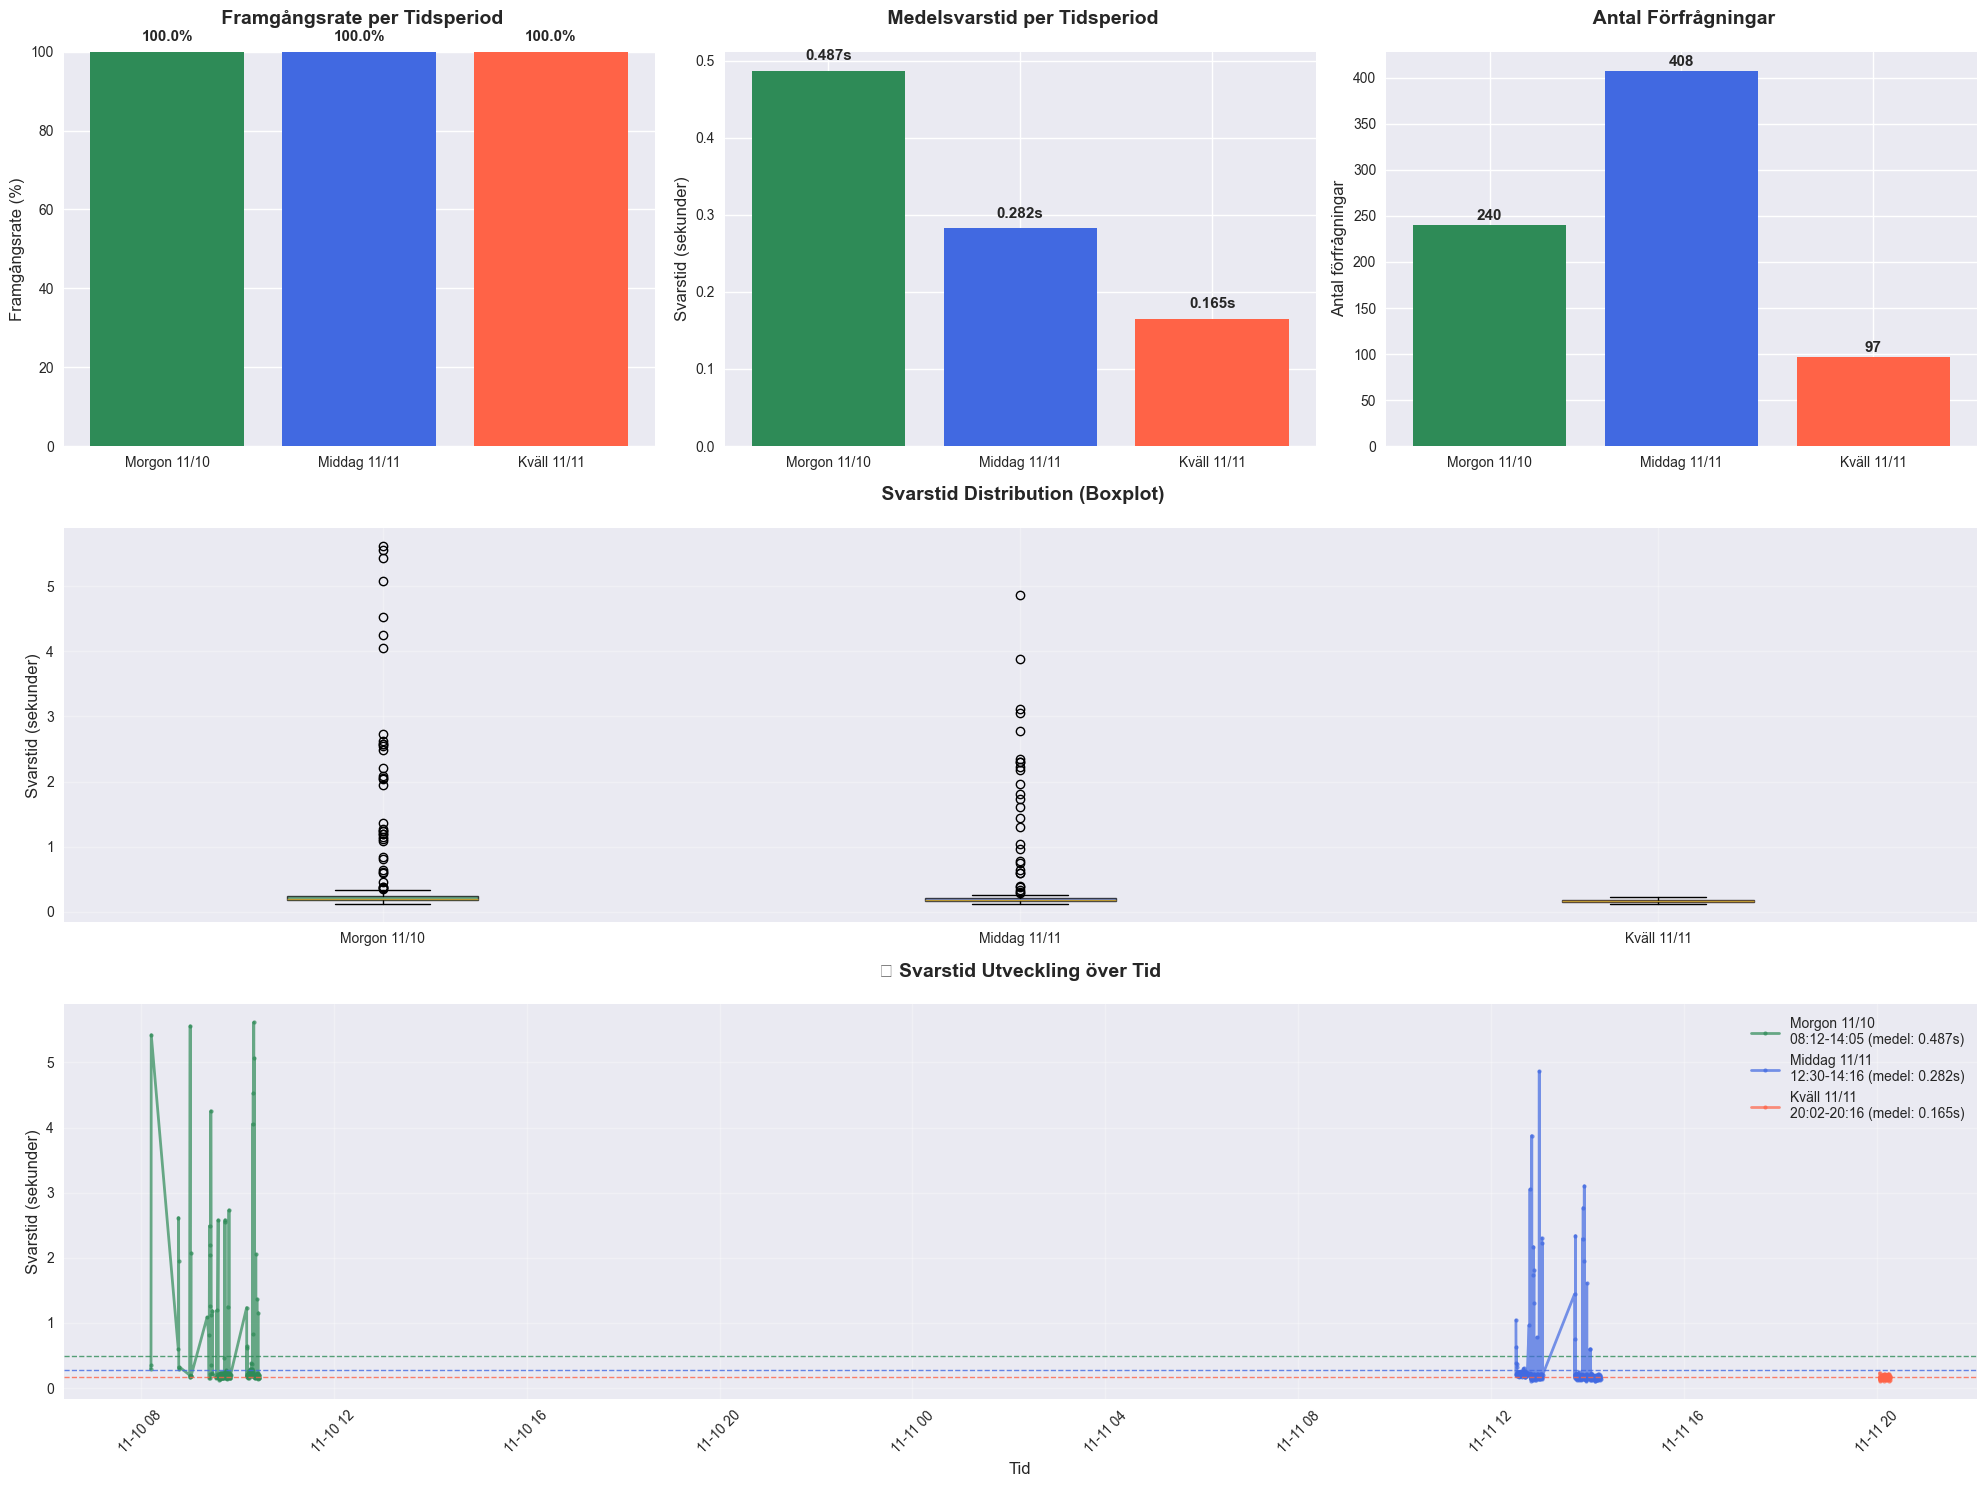

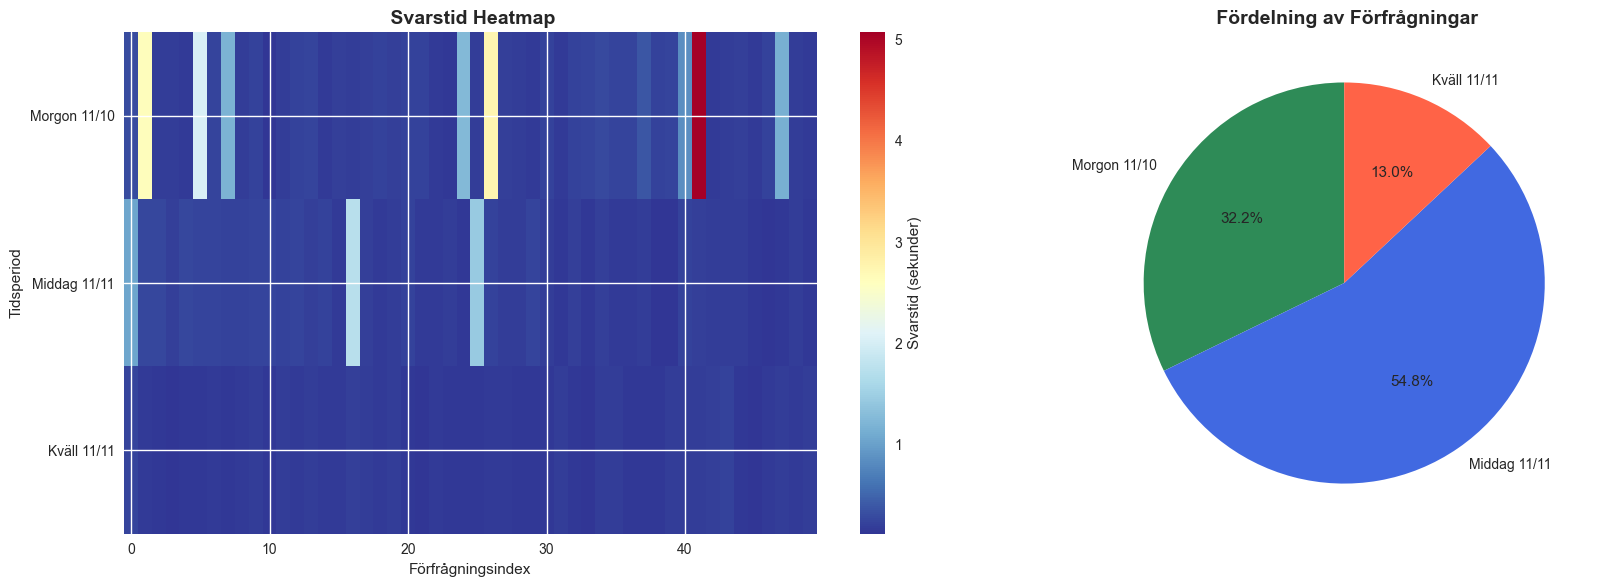


 TRENDANALYS & RÖDA TRÅDAR

 Bäst prestanda: Kväll 11/11
20:02-20:16
   • Lägst medelsvarstid: 0.1650s
   • Framgångsrate: 100.0%

  Sämst prestanda: Morgon 11/10
08:12-14:05
   • Högst medelsvarstid: 0.4870s
   • Framgångsrate: 100.0%

 Högst belastning: Middag 11/11
12:30-14:16
   • Antal förfrågningar: 408
   • Förfrågningar/minut: 3.87

🎯 NYCKELOBSERVATIONER:
   • Ingen stark korrelation mellan volym och svarstid (r=0.32)
   • Höga outlier-nivåer i: Morgon 11/10
08:12-14:05, Middag 11/11
12:30-14:16
   • Stabil prestanda i: Middag 11/11
12:30-14:16, Kväll 11/11
20:02-20:16

 REKOMMENDATIONER:
   • Morgon 11/10
08:12-14:05: Överväg optimering - hög svarstid
   • Middag 11/11
12:30-14:16: Överväg optimering - hög svarstid

 Analys klar! 3 tidsintervall analyserades.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns


plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


df = pd.read_csv('Data_clean.csv')


df['_timestamp'] = pd.to_datetime(df['_timestamp'])
df['_ack_timestamp'] = pd.to_datetime(df['_ack_timestamp'])


time_intervals = [
    {
        'name': 'Morgon 11/10\n08:12-14:05',
        'start': '2025-11-10 08:12:00',
        'end': '2025-11-10 14:05:00'
    },
    {
        'name': 'Middag 11/11\n12:30-14:16', 
        'start': '2025-11-11 12:30:00',
        'end': '2025-11-11 14:16:00'
    },
    {
        'name': 'Kväll 11/11\n20:02-20:16',
        'start': '2025-11-11 20:02:00',
        'end': '2025-11-11 20:16:00'
    }
]


def find_nearest_data(df, target_time, time_window_minutes=10):
    target = pd.to_datetime(target_time)
    start_time = target - timedelta(minutes=time_window_minutes)
    end_time = target + timedelta(minutes=time_window_minutes)
    
    mask = (df['_timestamp'] >= start_time) & (df['_timestamp'] <= end_time)
    nearest_data = df[mask]
    
    if len(nearest_data) > 0:
        nearest_data = nearest_data.copy()
        nearest_data['time_diff'] = abs(nearest_data['_timestamp'] - target)
        return nearest_data.loc[nearest_data['time_diff'].idxmin()]
    else:
        return None


results = []

for interval in time_intervals:
    start_time = pd.to_datetime(interval['start'])
    end_time = pd.to_datetime(interval['end'])
    
    
    mask = (df['_timestamp'] >= start_time) & (df['_timestamp'] <= end_time)
    interval_data = df[mask].copy()
    
    
    original_data_points = len(interval_data)
    
    if len(interval_data) == 0:
        print(f" Ingen data hittades för {interval['name']}. Söker närmaste data...")
        
        nearest_start = find_nearest_data(df, interval['start'])
        nearest_end = find_nearest_data(df, interval['end'])
        
        if nearest_start is not None and nearest_end is not None:
            actual_start = nearest_start['_timestamp']
            actual_end = nearest_end['_timestamp']
            
            mask = (df['_timestamp'] >= actual_start) & (df['_timestamp'] <= actual_end)
            interval_data = df[mask].copy()
            
            print(f" Använder data från {actual_start} till {actual_end}")
            interval['actual_times'] = f"{actual_start.strftime('%H:%M')}-{actual_end.strftime('%H:%M')}"
        else:
            print(f" Kunde inte hitta data för {interval['name']}")
            continue
    else:
        interval['actual_times'] = interval['name'].split('\n')[1]
    
    
    if len(interval_data) > 0:
        total_requests = len(interval_data)
        successful_requests = len(interval_data[interval_data['_ack_status'] == 0.0])
        success_rate = (successful_requests / total_requests) * 100
        
        
        response_times = interval_data['response_time']
        
        response_stats = {
            'mean': response_times.mean(),
            'median': response_times.median(),
            'min': response_times.min(),
            'max': response_times.max(),
            'std': response_times.std(),
            'p95': response_times.quantile(0.95),
            'p99': response_times.quantile(0.99)
        }
        
        
        Q1 = response_times.quantile(0.25)
        Q3 = response_times.quantile(0.75)
        IQR = Q3 - Q1
        outlier_threshold = Q3 + 1.5 * IQR
        outliers = len(response_times[response_times > outlier_threshold])
        outlier_percentage = (outliers / total_requests) * 100
        
        
        interval_data_sorted = interval_data.sort_values('_timestamp')
        if len(interval_data_sorted) > 1:
            time_diff = (interval_data_sorted['_timestamp'].iloc[-1] - interval_data_sorted['_timestamp'].iloc[0]).total_seconds() / 60
            requests_per_minute = total_requests / time_diff if time_diff > 0 else 0
            
            
            x = np.arange(len(interval_data_sorted))
            y = interval_data_sorted['response_time'].values
            trend_coef = np.polyfit(x, y, 1)[0] if len(x) > 1 else 0
        else:
            requests_per_minute = 0
            trend_coef = 0
        
        results.append({
            'interval': interval['name'],
            'actual_times': interval.get('actual_times', ''),
            'total_requests': total_requests,
            'successful_requests': successful_requests,
            'success_rate': success_rate,
            'response_stats': response_stats,
            'outliers': outliers,
            'outlier_percentage': outlier_percentage,
            'requests_per_minute': requests_per_minute,
            'trend_coef': trend_coef,
            'data': interval_data_sorted if len(interval_data_sorted) > 1 else interval_data
        })


print("\n" + "="*100)
print(" DETALJERAD STATISTIK - SAMMANFATTNING")
print("="*100)

for result in results:
    print(f"\n {result['interval']} ({result['actual_times']})")
    print(f"   {'─' * 60}")
    
    print(f"    Prestanda:")
    print(f"   • Totalt antal förfrågningar: {result['total_requests']:>4}")
    print(f"   • Lyckade förfrågningar:      {result['successful_requests']:>4}")
    print(f"   • Framgångsrate:              {result['success_rate']:>7.2f}%")
    print(f"   • Förfrågningar/minut:        {result['requests_per_minute']:>7.2f}")
    
    print(f"\n   ⏱  Svarstider:")
    print(f"   • Medel:                      {result['response_stats']['mean']:>7.4f}s")
    print(f"   • Median:                     {result['response_stats']['median']:>7.4f}s")
    print(f"   • Minimum:                    {result['response_stats']['min']:>7.4f}s")
    print(f"   • Maximum:                    {result['response_stats']['max']:>7.4f}s")
    print(f"   • Standardavvikelse:          {result['response_stats']['std']:>7.4f}s")
    print(f"   • 95:e percentil:             {result['response_stats']['p95']:>7.4f}s")
    print(f"   • 99:e percentil:             {result['response_stats']['p99']:>7.4f}s")
    
    print(f"\n     Kvalitetsmått:")
    print(f"   • Outliers:                   {result['outliers']:>4}")
    print(f"   • Outlier andel:              {result['outlier_percentage']:>7.2f}%")
    
    trend_indicator = " Ökande" if result['trend_coef'] > 0.001 else " Minskar" if result['trend_coef'] < -0.001 else " Stabil"
    print(f"   • Trend:                      {trend_indicator}")


if results:
    
    fig = plt.figure(figsize=(20, 15))
    
    
    gs = plt.GridSpec(3, 3, figure=fig)
    
    
    ax1 = fig.add_subplot(gs[0, 0])
    intervals_clean = [r['interval'].split('\n')[0] for r in results]
    success_rates = [r['success_rate'] for r in results]
    
    bars = ax1.bar(intervals_clean, success_rates, color=['#2E8B57', '#4169E1', '#FF6347'])
    ax1.set_title(' Framgångsrate per Tidsperiod', fontsize=14, fontweight='bold', pad=20)
    ax1.set_ylabel('Framgångsrate (%)', fontsize=12)
    ax1.set_ylim(0, 100)
    
    
    for bar, rate in zip(bars, success_rates):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
                f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    
    ax2 = fig.add_subplot(gs[0, 1])
    mean_response_times = [r['response_stats']['mean'] for r in results]
    
    bars2 = ax2.bar(intervals_clean, mean_response_times, color=['#2E8B57', '#4169E1', '#FF6347'])
    ax2.set_title(' Medelsvarstid per Tidsperiod', fontsize=14, fontweight='bold', pad=20)
    ax2.set_ylabel('Svarstid (sekunder)', fontsize=12)
    
    for bar, time in zip(bars2, mean_response_times):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{time:.3f}s', ha='center', va='bottom', fontweight='bold')
    
    
    ax3 = fig.add_subplot(gs[0, 2])
    total_requests = [r['total_requests'] for r in results]
    
    bars3 = ax3.bar(intervals_clean, total_requests, color=['#2E8B57', '#4169E1', '#FF6347'])
    ax3.set_title(' Antal Förfrågningar', fontsize=14, fontweight='bold', pad=20)
    ax3.set_ylabel('Antal förfrågningar', fontsize=12)
    
    for bar, count in zip(bars3, total_requests):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
                f'{count}', ha='center', va='bottom', fontweight='bold')
    
    
    ax4 = fig.add_subplot(gs[1, :])
    response_data = [r['data']['response_time'].values for r in results]
    
    box_plot = ax4.boxplot(response_data, labels=intervals_clean, patch_artist=True)
    
    colors = ['#2E8B57', '#4169E1', '#FF6347']
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax4.set_title(' Svarstid Distribution (Boxplot)', fontsize=14, fontweight='bold', pad=20)
    ax4.set_ylabel('Svarstid (sekunder)', fontsize=12)
    ax4.grid(True, alpha=0.3)
    
    
    ax5 = fig.add_subplot(gs[2, :])
    
    for i, result in enumerate(results):
        data = result['data']
        color = colors[i]
        label = f"{result['interval']} (medel: {result['response_stats']['mean']:.3f}s)"
        
        ax5.plot(data['_timestamp'], data['response_time'], 
                marker='o', linewidth=2, markersize=3, color=color, label=label, alpha=0.7)
        

        ax5.axhline(y=result['response_stats']['mean'], color=color, 
                   linestyle='--', alpha=0.8, linewidth=1)
    
    ax5.set_title('🕒 Svarstid Utveckling över Tid', fontsize=14, fontweight='bold', pad=20)
    ax5.set_ylabel('Svarstid (sekunder)', fontsize=12)
    ax5.set_xlabel('Tid', fontsize=12)
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    
    
    heatmap_data = []
    max_data_points = 50  
    
    for result in results:
        response_times = result['data']['response_time'].values
        if len(response_times) > max_data_points:
            
            indices = np.linspace(0, len(response_times)-1, max_data_points, dtype=int)
            response_times = response_times[indices]
        elif len(response_times) < max_data_points:
            
            response_times = np.pad(response_times, (0, max_data_points - len(response_times)), 
                                 constant_values=np.nan)
        heatmap_data.append(response_times)
    
    im = ax1.imshow(heatmap_data, cmap='RdYlBu_r', aspect='auto', 
                   interpolation='nearest')
    ax1.set_title(' Svarstid Heatmap', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Förfrågningsindex')
    ax1.set_ylabel('Tidsperiod')
    ax1.set_yticks(range(len(intervals_clean)))
    ax1.set_yticklabels(intervals_clean)
    plt.colorbar(im, ax=ax1, label='Svarstid (sekunder)')
    
    
    ax2.pie(total_requests, labels=intervals_clean, autopct='%1.1f%%', 
           colors=colors, startangle=90)
    ax2.set_title(' Fördelning av Förfrågningar', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    
    print("\n" + "="*80)
    print(" TRENDANALYS & RÖDA TRÅDAR")
    print("="*80)
    
    
    best_performance = min(results, key=lambda x: x['response_stats']['mean'])
    worst_performance = max(results, key=lambda x: x['response_stats']['mean'])
    highest_volume = max(results, key=lambda x: x['total_requests'])
    
    print(f"\n Bäst prestanda: {best_performance['interval']}")
    print(f"   • Lägst medelsvarstid: {best_performance['response_stats']['mean']:.4f}s")
    print(f"   • Framgångsrate: {best_performance['success_rate']:.1f}%")
    
    print(f"\n  Sämst prestanda: {worst_performance['interval']}")
    print(f"   • Högst medelsvarstid: {worst_performance['response_stats']['mean']:.4f}s")
    print(f"   • Framgångsrate: {worst_performance['success_rate']:.1f}%")
    
    print(f"\n Högst belastning: {highest_volume['interval']}")
    print(f"   • Antal förfrågningar: {highest_volume['total_requests']}")
    print(f"   • Förfrågningar/minut: {highest_volume['requests_per_minute']:.2f}")
    

    print(f"\n🎯 NYCKELOBSERVATIONER:")
    
   
    volumes = [r['total_requests'] for r in results]
    response_means = [r['response_stats']['mean'] for r in results]
    
    if len(volumes) > 1:
        correlation = np.corrcoef(volumes, response_means)[0,1]
        if abs(correlation) > 0.5:
            trend = "positiv" if correlation > 0 else "negativ"
            print(f"   • Stark {trend} korrelation mellan volym och svarstid (r={correlation:.2f})")
        else:
            print(f"   • Ingen stark korrelation mellan volym och svarstid (r={correlation:.2f})")
    
   
    high_outliers = [r for r in results if r['outlier_percentage'] > 5]
    if high_outliers:
        print(f"   • Höga outlier-nivåer i: {', '.join([r['interval'] for r in high_outliers])}")
    
    
    stable_periods = [r for r in results if abs(r['trend_coef']) < 0.001]
    if stable_periods:
        print(f"   • Stabil prestanda i: {', '.join([r['interval'] for r in stable_periods])}")
    
    print(f"\n REKOMMENDATIONER:")
    for result in results:
        if result['response_stats']['mean'] > 0.2:
            print(f"   • {result['interval']}: Överväg optimering - hög svarstid")
        if result['success_rate'] < 99:
            print(f"   • {result['interval']}: Förbättra reliabilitet - {result['success_rate']:.1f}% framgångsrate")

else:
    print(" Ingen data kunde analyseras. Kontrollera dina tidsintervall.")

print(f"\n Analys klar! {len(results)} tidsintervall analyserades.")

 STATISTIK - SAMMANFATTNING

Morgon
11/10 08:12-14:05
----------------------------------------
Antal förfrågningar:    240
Framgångsrate:        100.0%
Medelsvarstid:        0.487s
Median svarstid:      0.202s
Snabbaste svar:       0.127s
Långsammaste svar:    5.617s

Middag
11/11 12:30-14:16
----------------------------------------
Antal förfrågningar:    408
Framgångsrate:        100.0%
Medelsvarstid:        0.282s
Median svarstid:      0.185s
Snabbaste svar:       0.114s
Långsammaste svar:    4.865s

Kväll
11/11 20:02-20:16
----------------------------------------
Antal förfrågningar:     97
Framgångsrate:        100.0%
Medelsvarstid:        0.165s
Median svarstid:      0.166s
Snabbaste svar:       0.113s
Långsammaste svar:    0.234s


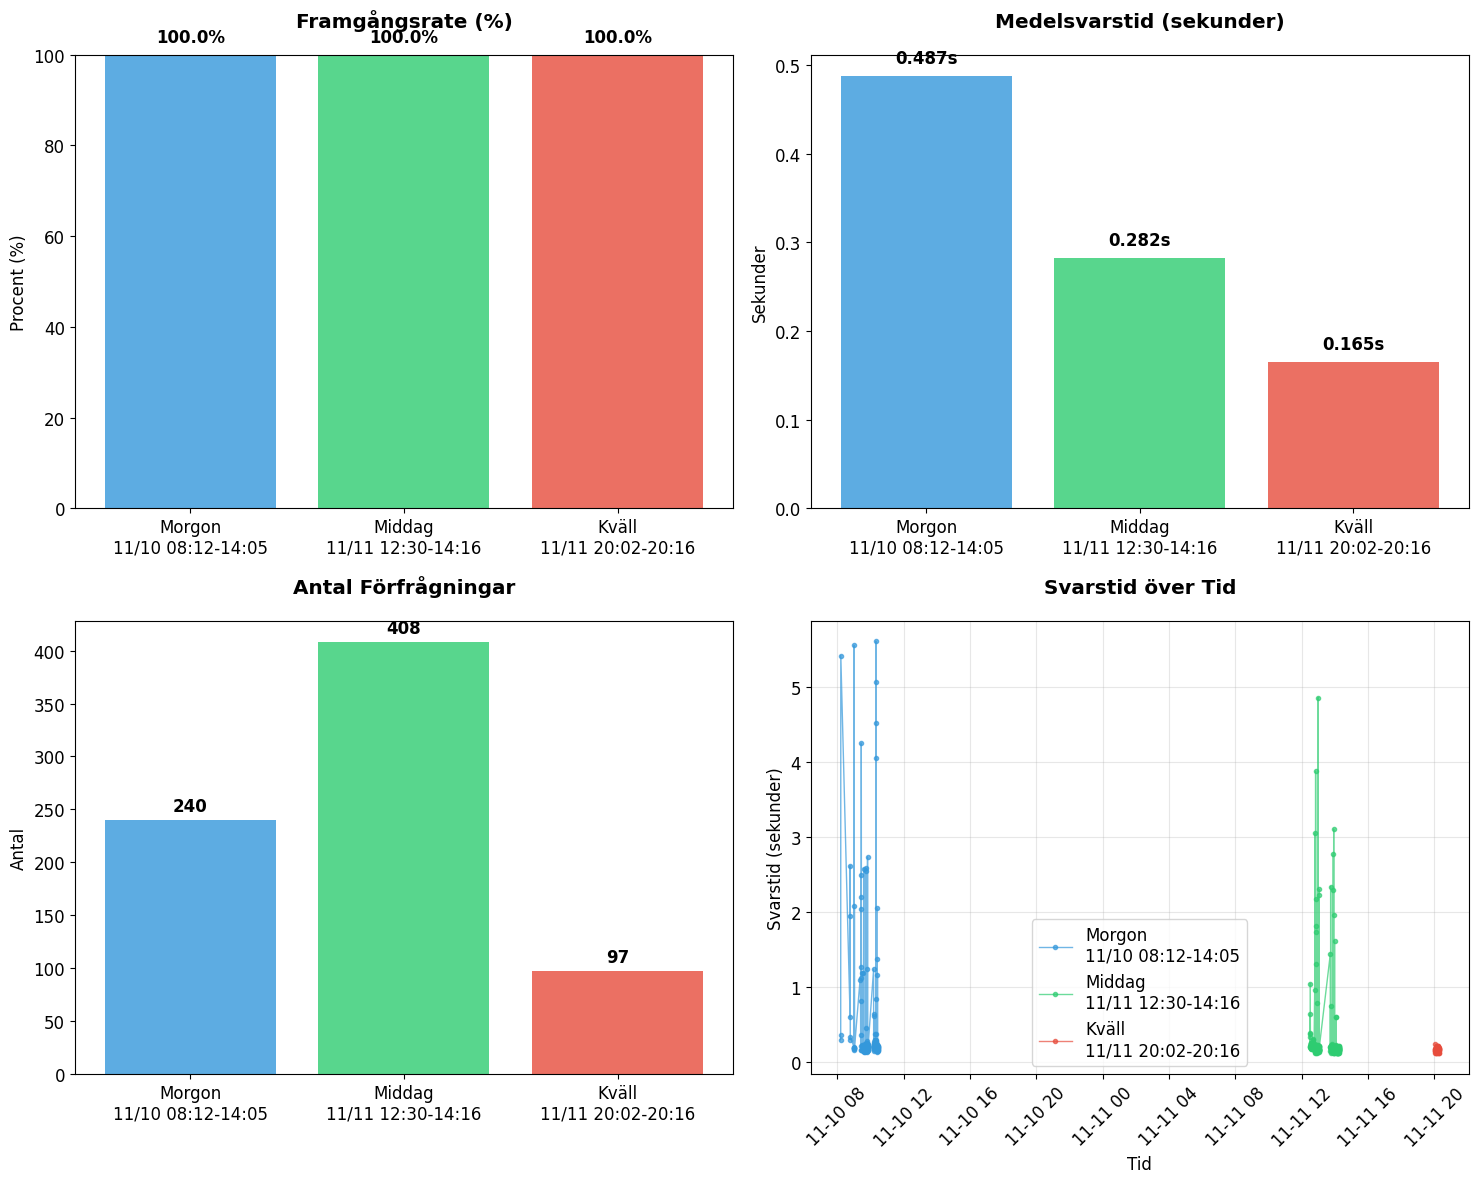

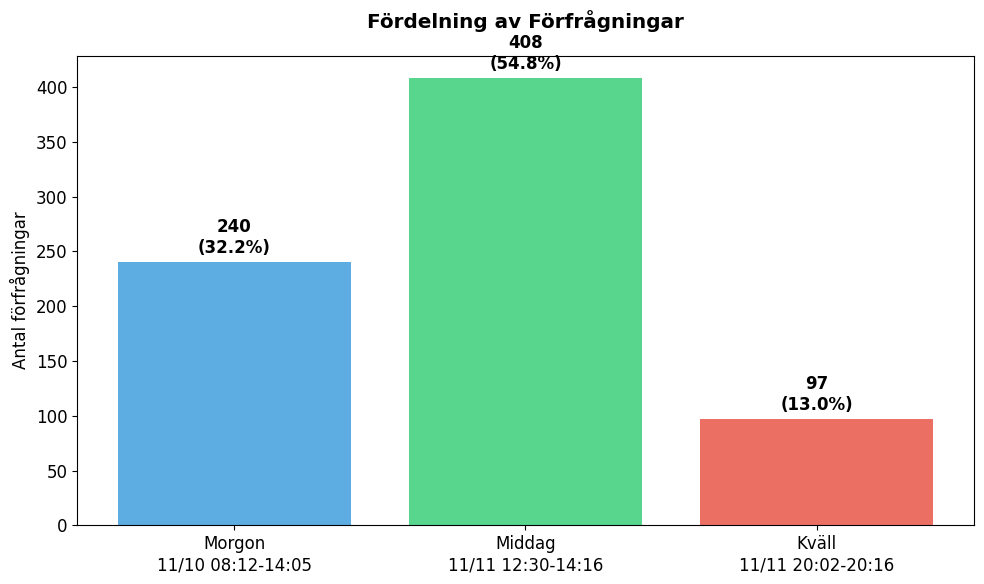

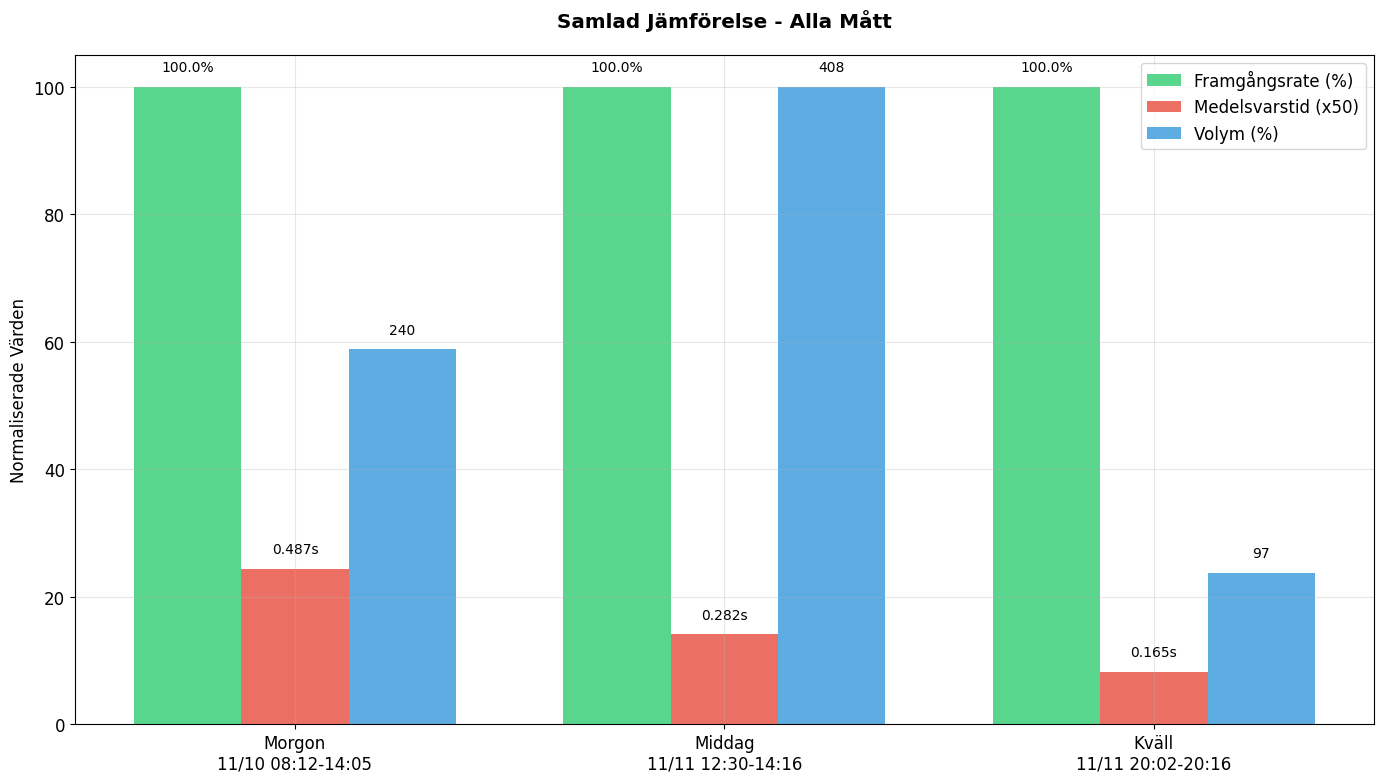


 SAMMANFATTNING I TABELLFORM

Period               Förfrågningar Framgångsrate Medeltid   Skillnad
----------------------------------------------------------------------
Morgon
11/10 08:12-14:05 240          100.0      % 0.487    s +0.322s
Middag
11/11 12:30-14:16 408          100.0      % 0.282    s +0.117s
Kväll
11/11 20:02-20:16 97           100.0      % 0.165    s BÄST

🔍 ENKEL TRENDANALYS

 Bäst prestanda: Kväll
11/11 20:02-20:16
   - Medelsvarstid: 0.165s
   - Framgångsrate: 100.0%

 Sämst prestanda: Morgon
11/10 08:12-14:05
   - Medelsvarstid: 0.487s
   - Framgångsrate: 100.0%

📈 Bästa perioden är 66.1% snabbare än sämsta

 Analys klar! 3 perioder analyserades.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta


plt.style.use('default')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12


df = pd.read_csv('Data_clean.csv')


df['_timestamp'] = pd.to_datetime(df['_timestamp'])


time_intervals = [
    {
        'name': 'Morgon\n11/10 08:12-14:05',
        'start': '2025-11-10 08:12:00',
        'end': '2025-11-10 14:05:00'
    },
    {
        'name': 'Middag\n11/11 12:30-14:16', 
        'start': '2025-11-11 12:30:00',
        'end': '2025-11-11 14:16:00'
    },
    {
        'name': 'Kväll\n11/11 20:02-20:16',
        'start': '2025-11-11 20:02:00',
        'end': '2025-11-11 20:16:00'
    }
]


results = []

for interval in time_intervals:
    start_time = pd.to_datetime(interval['start'])
    end_time = pd.to_datetime(interval['end'])
    
   
    mask = (df['_timestamp'] >= start_time) & (df['_timestamp'] <= end_time)
    interval_data = df[mask].copy()
    
    if len(interval_data) > 0:
        
        total_requests = len(interval_data)
        successful_requests = len(interval_data[interval_data['_ack_status'] == 0.0])
        success_rate = (successful_requests / total_requests) * 100
        
        response_times = interval_data['response_time']
        
        results.append({
            'interval': interval['name'],
            'total_requests': total_requests,
            'success_rate': success_rate,
            'mean_response': response_times.mean(),
            'median_response': response_times.median(),
            'max_response': response_times.max(),
            'min_response': response_times.min(),
            'data': interval_data.sort_values('_timestamp')
        })


print("=" * 70)
print(" STATISTIK - SAMMANFATTNING")
print("=" * 70)

for result in results:
    print(f"\n{result['interval']}")
    print("-" * 40)
    print(f"Antal förfrågningar: {result['total_requests']:>6}")
    print(f"Framgångsrate:       {result['success_rate']:>6.1f}%")
    print(f"Medelsvarstid:       {result['mean_response']:>6.3f}s")
    print(f"Median svarstid:     {result['median_response']:>6.3f}s")
    print(f"Snabbaste svar:      {result['min_response']:>6.3f}s")
    print(f"Långsammaste svar:   {result['max_response']:>6.3f}s")


if results:

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    
    names = [r['interval'] for r in results]
    success_rates = [r['success_rate'] for r in results]
    mean_times = [r['mean_response'] for r in results]
    total_reqs = [r['total_requests'] for r in results]
    

    colors = ['#3498db', '#2ecc71', '#e74c3c']
    
  
    bars1 = ax1.bar(names, success_rates, color=colors, alpha=0.8)
    ax1.set_title('Framgångsrate (%)', fontweight='bold', pad=20)
    ax1.set_ylabel('Procent (%)')
    ax1.set_ylim(0, 100)
    
    for bar, rate in zip(bars1, success_rates):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, height + 2, 
                f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    
    bars2 = ax2.bar(names, mean_times, color=colors, alpha=0.8)
    ax2.set_title('Medelsvarstid (sekunder)', fontweight='bold', pad=20)
    ax2.set_ylabel('Sekunder')
   
    for bar, time in zip(bars2, mean_times):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height + 0.01, 
                f'{time:.3f}s', ha='center', va='bottom', fontweight='bold')
    
   
    bars3 = ax3.bar(names, total_reqs, color=colors, alpha=0.8)
    ax3.set_title('Antal Förfrågningar', fontweight='bold', pad=20)
    ax3.set_ylabel('Antal')
    
    for bar, count in zip(bars3, total_reqs):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2, height + 5, 
                f'{count}', ha='center', va='bottom', fontweight='bold')
    

    ax4.set_title('Svarstid över Tid', fontweight='bold', pad=20)
    ax4.set_ylabel('Svarstid (sekunder)')
    ax4.set_xlabel('Tid')
    
    for i, result in enumerate(results):
        data = result['data']
        ax4.plot(data['_timestamp'], data['response_time'], 
                marker='o', markersize=3, linewidth=1, 
                color=colors[i], label=result['interval'], alpha=0.7)
    
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
   
    plt.figure(figsize=(10, 6))
    
   
    plt.bar(range(len(total_reqs)), total_reqs, color=colors, alpha=0.8)
    plt.title('Fördelning av Förfrågningar', fontweight='bold', pad=20)
    plt.ylabel('Antal förfrågningar')
    plt.xticks(range(len(names)), names)
    
  
    total_all = sum(total_reqs)
    for i, count in enumerate(total_reqs):
        percentage = (count / total_all) * 100
        plt.text(i, count + 5, f'{count}\n({percentage:.1f}%)', 
                ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    

    plt.figure(figsize=(14, 8))
    
 
    norm_success = [r['success_rate'] for r in results]
    norm_mean = [r['mean_response'] * 50 for r in results]  
    norm_volume = [r['total_requests'] / max(total_reqs) * 100 for r in results]
    
    x = np.arange(len(names))
    width = 0.25
    
    plt.bar(x - width, norm_success, width, label='Framgångsrate (%)', color='#2ecc71', alpha=0.8)
    plt.bar(x, norm_mean, width, label='Medelsvarstid (x50)', color='#e74c3c', alpha=0.8)
    plt.bar(x + width, norm_volume, width, label='Volym (%)', color='#3498db', alpha=0.8)
    
    plt.title('Samlad Jämförelse - Alla Mått', fontweight='bold', pad=20)
    plt.ylabel('Normaliserade Värden')
    plt.xticks(x, names)
    plt.legend()
    
   
    for i, (success, mean, volume) in enumerate(zip(success_rates, mean_times, total_reqs)):
        plt.text(i - width, norm_success[i] + 2, f'{success:.1f}%', ha='center', va='bottom', fontsize=10)
        plt.text(i, norm_mean[i] + 2, f'{mean:.3f}s', ha='center', va='bottom', fontsize=10)
        plt.text(i + width, norm_volume[i] + 2, f'{volume}', ha='center', va='bottom', fontsize=10)
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("\n" + "="*70)
    print(" SAMMANFATTNING I TABELLFORM")
    print("="*70)
    
  
    print(f"\n{'Period':<20} {'Förfrågningar':<12} {'Framgångsrate':<12} {'Medeltid':<10} {'Skillnad'}")
    print("-" * 70)
    
   
    best_time = min(mean_times)
    
    for i, result in enumerate(results):
        diff_from_best = result['mean_response'] - best_time
        diff_text = f"+{diff_from_best:.3f}s" if diff_from_best > 0 else "BÄST"
        
        print(f"{result['interval']:<20} {result['total_requests']:<12} {result['success_rate']:<11.1f}% {result['mean_response']:<9.3f}s {diff_text}")


    print("\n" + "="*70)
    print("🔍 ENKEL TRENDANALYS")
    print("="*70)
    
    
    best_idx = mean_times.index(min(mean_times))
    worst_idx = mean_times.index(max(mean_times))
    
    print(f"\n Bäst prestanda: {names[best_idx]}")
    print(f"   - Medelsvarstid: {mean_times[best_idx]:.3f}s")
    print(f"   - Framgångsrate: {success_rates[best_idx]:.1f}%")
    
    print(f"\n Sämst prestanda: {names[worst_idx]}")
    print(f"   - Medelsvarstid: {mean_times[worst_idx]:.3f}s") 
    print(f"   - Framgångsrate: {success_rates[worst_idx]:.1f}%")
    
    
    improvement = ((mean_times[worst_idx] - mean_times[best_idx]) / mean_times[worst_idx]) * 100
    print(f"\n📈 Bästa perioden är {improvement:.1f}% snabbare än sämsta")

else:
    print(" Ingen data kunde analyseras")

print(f"\n Analys klar! {len(results)} perioder analyserades.")

Söker: WiFi + App 10:35-10:51
 Hittade 202 förfrågningar
Söker: 4G + App 11:12-11:27
 Hittade 98 förfrågningar

 RESULTAT

WiFi + App 10:35-10:51
Framgångsrate: 100.0%
Medeltid: 0.377s
95% under: 1.245s
Antal: 202

4G + App 11:12-11:27
Framgångsrate: 100.0%
Medeltid: 0.454s
95% under: 1.471s
Antal: 98


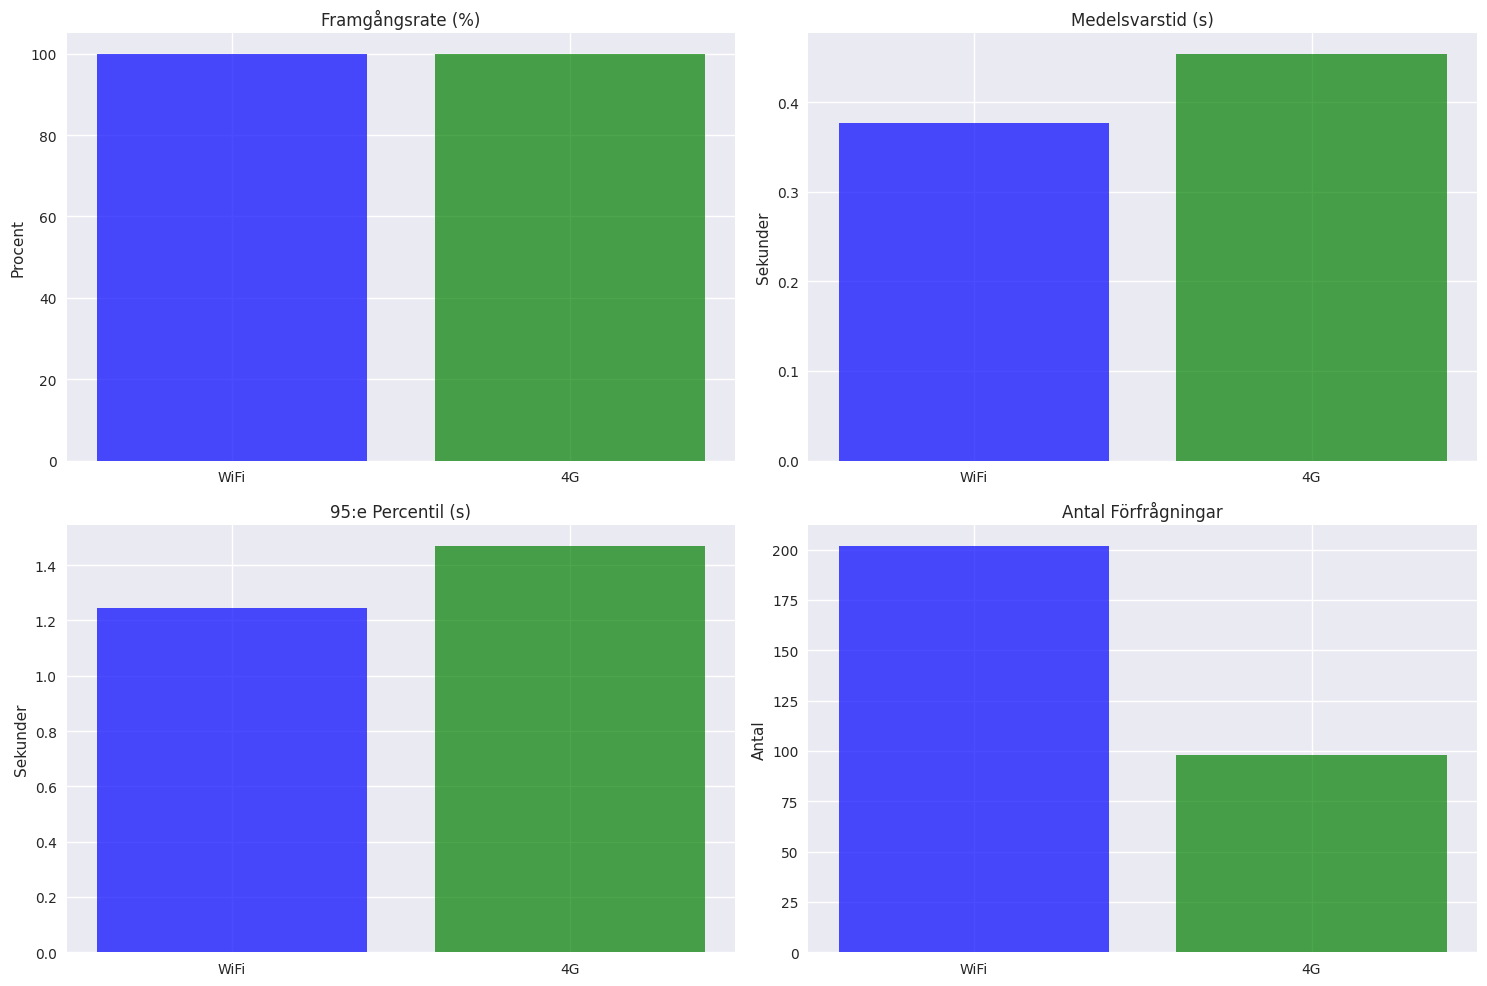


 PROCENTUELL JÄMFÖRELSE

WiFi: 100.0% framgång, 0.377s medeltid
4G:  100.0% framgång, 0.454s medeltid

 Skillnader:
• WiFi har +0.0% bättre framgångsrate
• WiFi är +16.9% snabbare
 DELAD VINST - Båda har fördelar


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta


df = pd.read_csv('Data_clean.csv')
df['_timestamp'] = pd.to_datetime(df['_timestamp'])


intervals = [
    {'name': 'WiFi + App 10:35-10:51', 'tech': 'WiFi', 'start': '2025-11-10 10:35:00', 'end': '2025-11-10 10:51:00'},
    {'name': '4G + App 11:12-11:27', 'tech': '4G', 'start': '2025-11-10 11:12:00', 'end': '2025-11-10 11:27:00'}
]

results = []

for interval in intervals:
    print(f"Söker: {interval['name']}")
    
    
    start_adj = pd.to_datetime(interval['start']) - timedelta(hours=1)
    end_adj = pd.to_datetime(interval['start']) 
    
   
    mask = (df['_timestamp'] >= start_adj) & (df['_timestamp'] <= end_adj)
    data = df[mask]
    
    if len(data) > 0:
        success_rate = (len(data[data['_ack_status'] == 0.0]) / len(data)) * 100
        response = data['response_time']
        
        results.append({
            'name': interval['name'],
            'tech': interval['tech'],
            'success_rate': success_rate,
            'mean_time': response.mean(),
            'p95': response.quantile(0.95),
            'requests': len(data),
            'data': data
        })
        print(f" Hittade {len(data)} förfrågningar")
    else:
        print(f" Ingen data")


print("\n" + "="*50)
print(" RESULTAT")
print("="*50)

for r in results:
    print(f"\n{r['name']}")
    print(f"Framgångsrate: {r['success_rate']:.1f}%")
    print(f"Medeltid: {r['mean_time']:.3f}s")
    print(f"95% under: {r['p95']:.3f}s")
    print(f"Antal: {r['requests']}")


if len(results) == 2:
    wifi, g4 = results[0], results[1]
    
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
  
    ax1.bar(['WiFi', '4G'], [wifi['success_rate'], g4['success_rate']], color=['blue', 'green'], alpha=0.7)
    ax1.set_title('Framgångsrate (%)')
    ax1.set_ylabel('Procent')
    
  
    ax2.bar(['WiFi', '4G'], [wifi['mean_time'], g4['mean_time']], color=['blue', 'green'], alpha=0.7)
    ax2.set_title('Medelsvarstid (s)')
    ax2.set_ylabel('Sekunder')
    
   
    ax3.bar(['WiFi', '4G'], [wifi['p95'], g4['p95']], color=['blue', 'green'], alpha=0.7)
    ax3.set_title('95:e Percentil (s)')
    ax3.set_ylabel('Sekunder')
    
    
    ax4.bar(['WiFi', '4G'], [wifi['requests'], g4['requests']], color=['blue', 'green'], alpha=0.7)
    ax4.set_title('Antal Förfrågningar')
    ax4.set_ylabel('Antal')
    
    plt.tight_layout()
    plt.show()
    
    
    print("\n" + "="*50)
    print(" PROCENTUELL JÄMFÖRELSE")
    print("="*50)
    
    success_diff = g4['success_rate'] - wifi['success_rate']
    time_diff = wifi['mean_time'] - g4['mean_time']
    time_diff_percent = (time_diff / g4['mean_time']) * 100
    
    print(f"\nWiFi: {wifi['success_rate']:.1f}% framgång, {wifi['mean_time']:.3f}s medeltid")
    print(f"4G:  {g4['success_rate']:.1f}% framgång, {g4['mean_time']:.3f}s medeltid")
    
    print(f"\n Skillnader:")
    if success_diff > 0:
        print(f"• 4G har {success_diff:+.1f}% bättre framgångsrate")
    else:
        print(f"• WiFi har {abs(success_diff):+.1f}% bättre framgångsrate")
    
    if time_diff > 0:
        print(f"• 4G är {time_diff_percent:+.1f}% snabbare")
    else:
        print(f"• WiFi är {abs(time_diff_percent):+.1f}% snabbare")
    
    
    if success_diff > 0 and time_diff > 0:
        print(f" 4G VINNARE - Bättre på båda måtten!")
    elif success_diff < 0 and time_diff < 0:
        print(f" WiFi VINNARE - Bättre på båda måtten!")
    else:
        print(f" DELAD VINST - Båda har fördelar")



Söker: Jobbet WiFi
10:35-10:51
 Hittade 202 förfrågningar (09:35-10:35)
Söker: Hemma WiFi
13:49-14:04
 Hittade 128 förfrågningar (12:49-13:49)

📊 JÄMFÖRELSE: JOBbet WiFi vs HEMMA WiFi

Jobbet WiFi
10:35-10:51
Plats: Jobbet
----------------------------------------
Framgångsrate: 100.0%
Medeltid: 0.377s
Median: 0.199s
Snabbast: 0.127s
Långsammast: 5.617s
95% under: 1.245s
Antal förfrågningar: 202

Hemma WiFi
13:49-14:04
Plats: Hemma
----------------------------------------
Framgångsrate: 100.0%
Medeltid: 0.360s
Median: 0.179s
Snabbast: 0.116s
Långsammast: 4.865s
95% under: 1.789s
Antal förfrågningar: 128


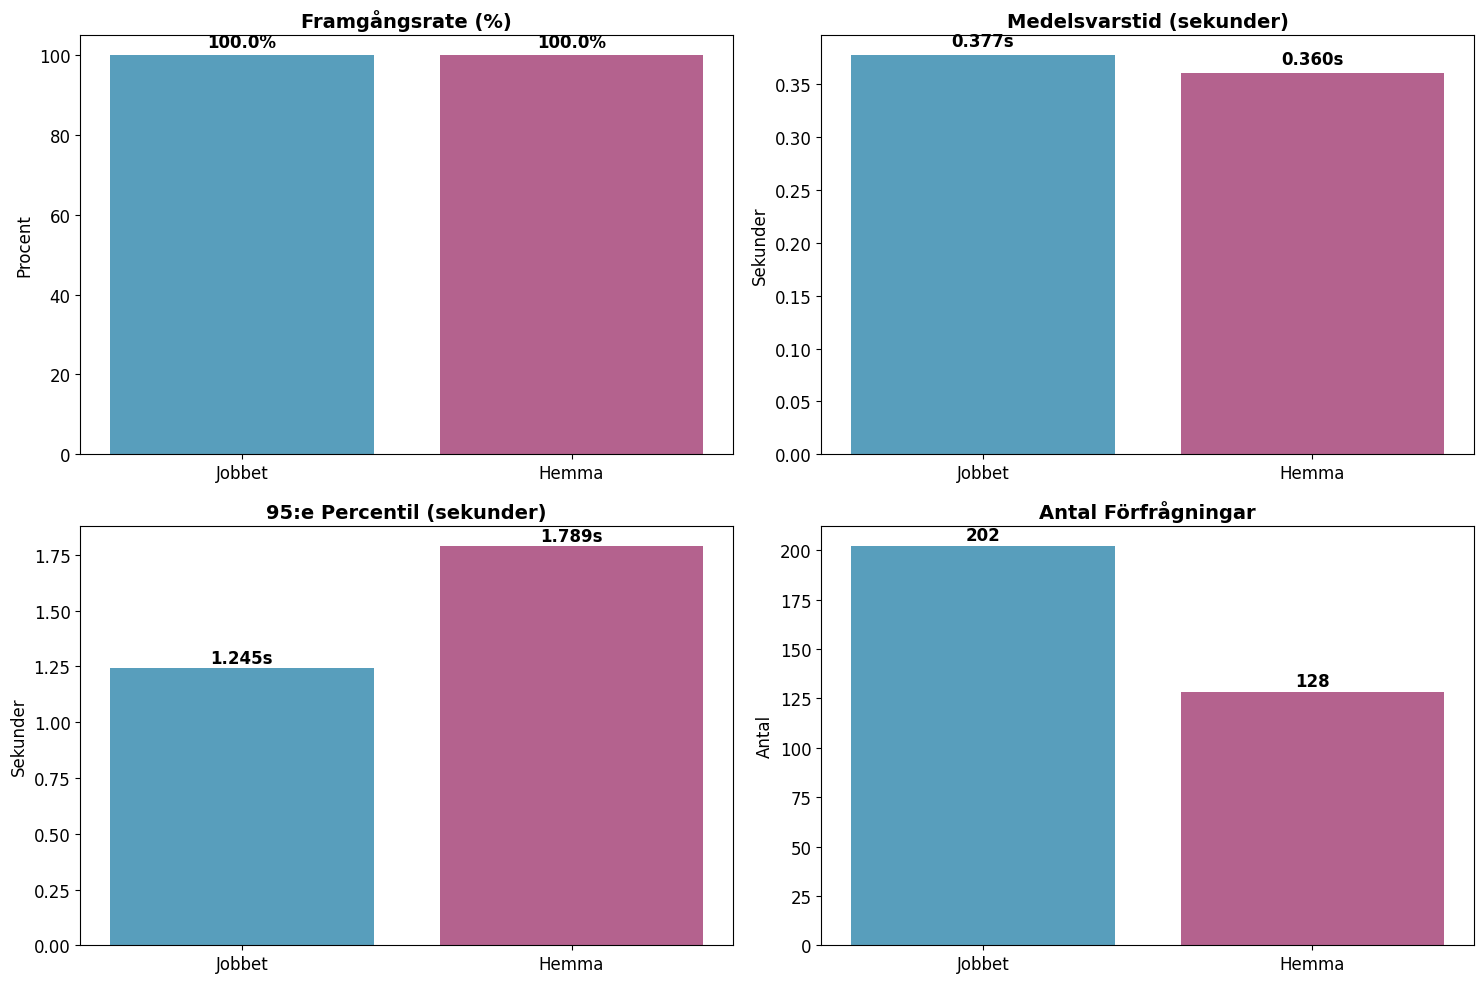


 DETAILERAD JÄMFÖRELSE

 **Resultat:**
Jobbet:  100.0% framgång, 0.377s medeltid
Hemma:   100.0% framgång, 0.360s medeltid

 **Skillnader:**
• Jobbet har +0.0% bättre framgångsrate
• Hemma är +4.7% snabbare

 **Stabilitet:**
• Jobbet: 5.490s variation (min 0.127s - max 5.617s)
• Hemma:  4.749s variation (min 0.116s - max 4.865s)
• Hemma är 13.5% mer stabilt

 **SAMMANFATTNING:**
• HEMMA WiFi VINNARE - Bättre totalprestanda
• Hemma är 4.0% bättre totalt sett

 Jämförelse klar! 2 intervall analyserade.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta


df = pd.read_csv('Data_clean.csv')
df['_timestamp'] = pd.to_datetime(df['_timestamp'])


intervals = [
    {'name': 'Jobbet WiFi\n10:35-10:51', 'location': 'Jobbet', 'start': '2025-11-10 10:35:00', 'end': '2025-11-10 10:51:00'},
    {'name': 'Hemma WiFi\n13:49-14:04', 'location': 'Hemma', 'start': '2025-11-11 13:49:00', 'end': '2025-11-11 14:04:00'}
]

results = []

for interval in intervals:
    print(f"Söker: {interval['name']}")
    
    
    start_adj = pd.to_datetime(interval['start']) - timedelta(hours=1)
    end_adj = pd.to_datetime(interval['start'])  # Använd start som slut
    
 
    mask = (df['_timestamp'] >= start_adj) & (df['_timestamp'] <= end_adj)
    data = df[mask]
    
    if len(data) > 0:
        success_rate = (len(data[data['_ack_status'] == 0.0]) / len(data)) * 100
        response = data['response_time']
        
        results.append({
            'name': interval['name'],
            'location': interval['location'],
            'success_rate': success_rate,
            'mean_time': response.mean(),
            'median_time': response.median(),
            'p95': response.quantile(0.95),
            'min_time': response.min(),
            'max_time': response.max(),
            'requests': len(data),
            'data': data
        })
        print(f" Hittade {len(data)} förfrågningar ({start_adj.strftime('%H:%M')}-{end_adj.strftime('%H:%M')})")
    else:
        print(f" Ingen data hittades")


print("\n" + "="*60)
print("📊 JÄMFÖRELSE: JOBbet WiFi vs HEMMA WiFi")
print("="*60)

for r in results:
    print(f"\n{r['name']}")
    print(f"Plats: {r['location']}")
    print("-" * 40)
    print(f"Framgångsrate: {r['success_rate']:.1f}%")
    print(f"Medeltid: {r['mean_time']:.3f}s")
    print(f"Median: {r['median_time']:.3f}s")
    print(f"Snabbast: {r['min_time']:.3f}s")
    print(f"Långsammast: {r['max_time']:.3f}s")
    print(f"95% under: {r['p95']:.3f}s")
    print(f"Antal förfrågningar: {r['requests']}")


if len(results) == 2:
    jobb, hemma = results[0], results[1]
    
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    colors = ['#2E86AB', '#A23B72']
    
    
    bars1 = ax1.bar(['Jobbet', 'Hemma'], [jobb['success_rate'], hemma['success_rate']], 
                   color=colors, alpha=0.8)
    ax1.set_title('Framgångsrate (%)', fontweight='bold', fontsize=14)
    ax1.set_ylabel('Procent')
    ax1.set_ylim(0, 105)
    for bar, rate in zip(bars1, [jobb['success_rate'], hemma['success_rate']]):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')
    
   
    bars2 = ax2.bar(['Jobbet', 'Hemma'], [jobb['mean_time'], hemma['mean_time']], 
                   color=colors, alpha=0.8)
    ax2.set_title('Medelsvarstid (sekunder)', fontweight='bold', fontsize=14)
    ax2.set_ylabel('Sekunder')
    for bar, time in zip(bars2, [jobb['mean_time'], hemma['mean_time']]):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                f'{time:.3f}s', ha='center', va='bottom', fontweight='bold')
    
   
    bars3 = ax3.bar(['Jobbet', 'Hemma'], [jobb['p95'], hemma['p95']], 
                   color=colors, alpha=0.8)
    ax3.set_title('95:e Percentil (sekunder)', fontweight='bold', fontsize=14)
    ax3.set_ylabel('Sekunder')
    for bar, p95 in zip(bars3, [jobb['p95'], hemma['p95']]):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                f'{p95:.3f}s', ha='center', va='bottom', fontweight='bold')
    
   
    bars4 = ax4.bar(['Jobbet', 'Hemma'], [jobb['requests'], hemma['requests']], 
                   color=colors, alpha=0.8)
    ax4.set_title('Antal Förfrågningar', fontweight='bold', fontsize=14)
    ax4.set_ylabel('Antal')
    for bar, count in zip(bars4, [jobb['requests'], hemma['requests']]):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{count}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    
    print("\n" + "="*60)
    print(" DETAILERAD JÄMFÖRELSE")
    print("="*60)
    
    
    success_diff = hemma['success_rate'] - jobb['success_rate']
    time_diff = jobb['mean_time'] - hemma['mean_time']
    time_diff_percent = (time_diff / hemma['mean_time']) * 100 if hemma['mean_time'] > 0 else 0
    
    print(f"\n **Resultat:**")
    print(f"Jobbet:  {jobb['success_rate']:.1f}% framgång, {jobb['mean_time']:.3f}s medeltid")
    print(f"Hemma:   {hemma['success_rate']:.1f}% framgång, {hemma['mean_time']:.3f}s medeltid")
    
    print(f"\n **Skillnader:**")
    if success_diff > 0:
        print(f"• Hemma har {success_diff:+.1f}% bättre framgångsrate")
    else:
        print(f"• Jobbet har {abs(success_diff):+.1f}% bättre framgångsrate")
    
    if time_diff > 0:
        print(f"• Hemma är {time_diff_percent:+.1f}% snabbare")
    else:
        print(f"• Jobbet är {abs(time_diff_percent):+.1f}% snabbare")
    
    
    jobb_range = jobb['max_time'] - jobb['min_time']
    hemma_range = hemma['max_time'] - hemma['min_time']
    
    print(f"\n **Stabilitet:**")
    print(f"• Jobbet: {jobb_range:.3f}s variation (min {jobb['min_time']:.3f}s - max {jobb['max_time']:.3f}s)")
    print(f"• Hemma:  {hemma_range:.3f}s variation (min {hemma['min_time']:.3f}s - max {hemma['max_time']:.3f}s)")
    
    if jobb_range < hemma_range:
        print(f"• Jobbet är {((hemma_range - jobb_range) / hemma_range * 100):.1f}% mer stabilt")
    else:
        print(f"• Hemma är {((jobb_range - hemma_range) / jobb_range * 100):.1f}% mer stabilt")
    
   
    print(f"\n **SAMMANFATTNING:**")
    jobb_score = (jobb['success_rate'] / 100) + (1 / jobb['mean_time']) + (1 / jobb_range)
    hemma_score = (hemma['success_rate'] / 100) + (1 / hemma['mean_time']) + (1 / hemma_range)
    
    if jobb_score > hemma_score:
        print(f"• JOBbet WiFi VINNARE - Bättre totalprestanda")
        improvement = ((jobb_score - hemma_score) / hemma_score) * 100
        print(f"• Jobbet är {improvement:.1f}% bättre totalt sett")
    else:
        print(f"• HEMMA WiFi VINNARE - Bättre totalprestanda")
        improvement = ((hemma_score - jobb_score) / jobb_score) * 100
        print(f"• Hemma är {improvement:.1f}% bättre totalt sett")

else:
    print(f"\n Behöver exakt 2 intervall för jämförelse.")

print(f"\n Jämförelse klar! {len(results)} intervall analyserade.")

Söker: Hemma 4G
15:03-15:16
 Hittade 94 förfrågningar (14:03-15:03)
Söker: Källaren 4G
21:04-21:16
 Hittade 93 förfrågningar (20:04-21:04)

 4G JÄMFÖRELSE: HEMMA vs KÄLLAREN

Hemma 4G
15:03-15:16
Plats: Hemma | Teknologi: 4G
---------------------------------------------
Framgångsrate:       100.0%
Medeltid:            0.169s
Median:              0.166s
95:e percentil:      0.212s
99:e percentil:      0.255s
Snabbast:            0.115s
Långsammast:         0.600s
Standardavvikelse:   0.052s
Antal förfrågningar:   94

Källaren 4G
21:04-21:16
Plats: Källaren | Teknologi: 4G
---------------------------------------------
Framgångsrate:       100.0%
Medeltid:            0.166s
Median:              0.166s
95:e percentil:      0.204s
99:e percentil:      0.214s
Snabbast:            0.113s
Långsammast:         0.217s
Standardavvikelse:   0.025s
Antal förfrågningar:   93


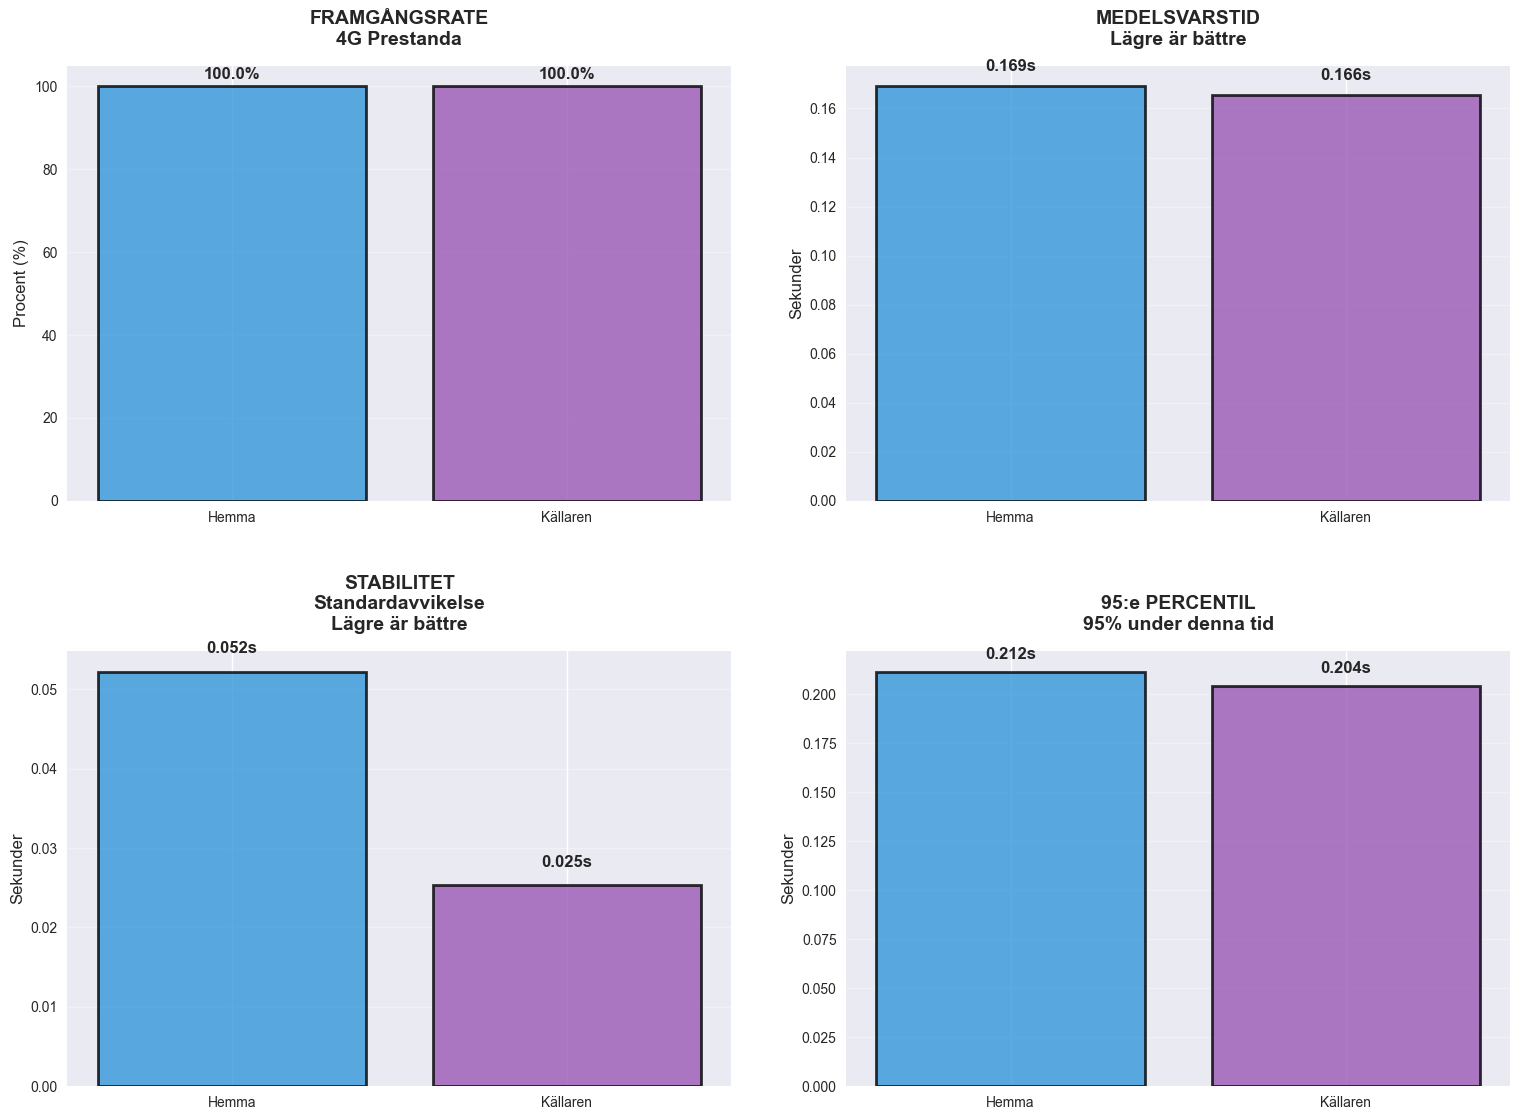

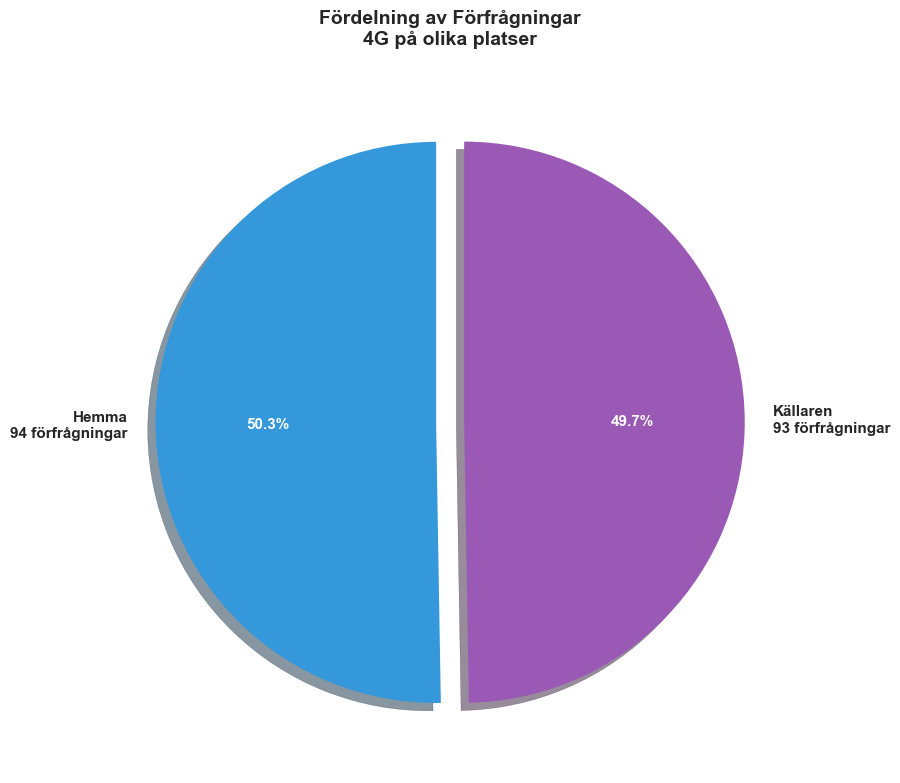

C:\Users\sebas\AppData\Local\Temp\ipykernel_17296\3086680264.py:159: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(response_data, labels=['Hemma 4G', 'Källaren 4G'], patch_artist=True)


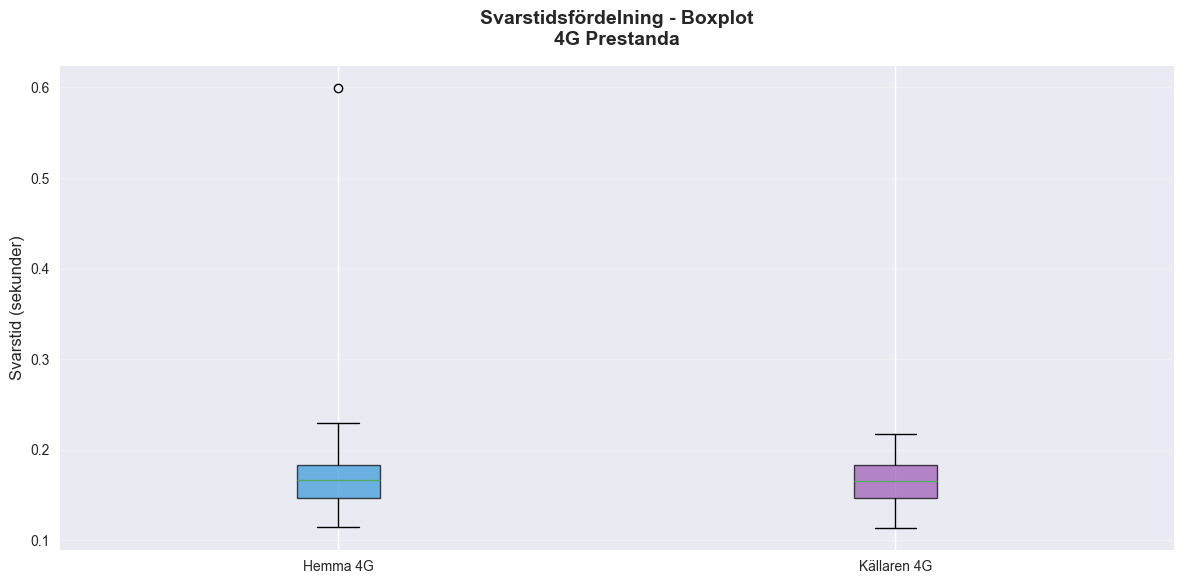


📊 DETAILERAD 4G ANALYS

 **4G Prestanda Sammanfattning:**
Hemma:    100.0% framgång, 0.169s medeltid
Källaren: 100.0% framgång, 0.166s medeltid

 **Skillnader:**
• Hemma har +0.0% bättre framgångsrate
• Källaren är +2.1% snabbare

 **Stabilitet (Standardavvikelse):**
• Hemma: 0.052s
• Källaren: 0.025s
• Källaren är 51.6% mer stabilt

 **SLUTSATS:**


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['font.size'] = 12


df = pd.read_csv('Data_clean.csv')
df['_timestamp'] = pd.to_datetime(df['_timestamp'])


intervals = [
    {'name': 'Hemma 4G\n15:03-15:16', 'location': 'Hemma', 'tech': '4G', 'start': '2025-11-11 15:03:00', 'end': '2025-11-11 15:16:00'},
    {'name': 'Källaren 4G\n21:04-21:16', 'location': 'Källaren', 'tech': '4G', 'start': '2025-11-11 21:04:00', 'end': '2025-11-11 21:16:00'}
]

results = []

for interval in intervals:
    print(f"Söker: {interval['name']}")
    
    # Justera tid -1 timme
    start_adj = pd.to_datetime(interval['start']) - timedelta(hours=1)
    end_adj = pd.to_datetime(interval['start'])  # Använd start som slut
    
    # Hitta data
    mask = (df['_timestamp'] >= start_adj) & (df['_timestamp'] <= end_adj)
    data = df[mask]
    
    if len(data) > 0:
        success_rate = (len(data[data['_ack_status'] == 0.0]) / len(data)) * 100
        response = data['response_time']
        
        results.append({
            'name': interval['name'],
            'location': interval['location'],
            'success_rate': success_rate,
            'mean_time': response.mean(),
            'median_time': response.median(),
            'p95': response.quantile(0.95),
            'p99': response.quantile(0.99),
            'min_time': response.min(),
            'max_time': response.max(),
            'std_dev': response.std(),
            'requests': len(data),
            'data': data
        })
        print(f" Hittade {len(data)} förfrågningar ({start_adj.strftime('%H:%M')}-{end_adj.strftime('%H:%M')})")
    else:
        print(f" Ingen data hittades")

# Visa resultat
print("\n" + "="*70)
print(" 4G JÄMFÖRELSE: HEMMA vs KÄLLAREN")
print("="*70)

for r in results:
    print(f"\n{r['name']}")
    print(f"Plats: {r['location']} | Teknologi: 4G")
    print("-" * 45)
    print(f"Framgångsrate:     {r['success_rate']:>7.1f}%")
    print(f"Medeltid:          {r['mean_time']:>7.3f}s")
    print(f"Median:            {r['median_time']:>7.3f}s")
    print(f"95:e percentil:    {r['p95']:>7.3f}s")
    print(f"99:e percentil:    {r['p99']:>7.3f}s")
    print(f"Snabbast:          {r['min_time']:>7.3f}s")
    print(f"Långsammast:       {r['max_time']:>7.3f}s")
    print(f"Standardavvikelse: {r['std_dev']:>7.3f}s")
    print(f"Antal förfrågningar: {r['requests']:>4}")


if len(results) == 2:
    hemma, kallaren = results[0], results[1]
    
    
    colors = ['#3498db', '#9b59b6']
    locations = ['Hemma', 'Källaren']
    
  
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
   
    bars1 = axes[0,0].bar(locations, [hemma['success_rate'], kallaren['success_rate']], 
                         color=colors, alpha=0.8, edgecolor='black', linewidth=2)
    axes[0,0].set_title('FRAMGÅNGSRATE\n4G Prestanda', fontweight='bold', fontsize=14, pad=15)
    axes[0,0].set_ylabel('Procent (%)', fontsize=12)
    axes[0,0].set_ylim(0, 105)
    axes[0,0].grid(True, alpha=0.3, axis='y')
    for bar, rate in zip(bars1, [hemma['success_rate'], kallaren['success_rate']]):
        axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                      f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

    
    bars2 = axes[0,1].bar(locations, [hemma['mean_time'], kallaren['mean_time']], 
                         color=colors, alpha=0.8, edgecolor='black', linewidth=2)
    axes[0,1].set_title('MEDELSVARSTID\nLägre är bättre', fontweight='bold', fontsize=14, pad=15)
    axes[0,1].set_ylabel('Sekunder', fontsize=12)
    axes[0,1].grid(True, alpha=0.3, axis='y')
    for bar, time in zip(bars2, [hemma['mean_time'], kallaren['mean_time']]):
        axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                      f'{time:.3f}s', ha='center', va='bottom', fontweight='bold', fontsize=12)

    
    bars3 = axes[1,0].bar(locations, [hemma['std_dev'], kallaren['std_dev']], 
                         color=colors, alpha=0.8, edgecolor='black', linewidth=2)
    axes[1,0].set_title('STABILITET\nStandardavvikelse\nLägre är bättre', fontweight='bold', fontsize=14, pad=15)
    axes[1,0].set_ylabel('Sekunder', fontsize=12)
    axes[1,0].grid(True, alpha=0.3, axis='y')
    for bar, std in zip(bars3, [hemma['std_dev'], kallaren['std_dev']]):
        axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002, 
                      f'{std:.3f}s', ha='center', va='bottom', fontweight='bold', fontsize=12)

    
    bars4 = axes[1,1].bar(locations, [hemma['p95'], kallaren['p95']], 
                         color=colors, alpha=0.8, edgecolor='black', linewidth=2)
    axes[1,1].set_title('95:e PERCENTIL\n95% under denna tid', fontweight='bold', fontsize=14, pad=15)
    axes[1,1].set_ylabel('Sekunder', fontsize=12)
    axes[1,1].grid(True, alpha=0.3, axis='y')
    for bar, p95 in zip(bars4, [hemma['p95'], kallaren['p95']]):
        axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                      f'{p95:.3f}s', ha='center', va='bottom', fontweight='bold', fontsize=12)

    
    for ax in axes.flat:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    plt.tight_layout(pad=3.0)
    plt.show()

    
    plt.figure(figsize=(10, 8))
    sizes = [hemma['requests'], kallaren['requests']]
    labels = [f'Hemma\n{hemma["requests"]} förfrågningar', f'Källaren\n{kallaren["requests"]} förfrågningar']
    
    wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
                                      startangle=90, shadow=True, explode=[0.05, 0.05])
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(11)
    
    for text in texts:
        text.set_fontsize(11)
        text.set_fontweight('bold')
    
    plt.title('Fördelning av Förfrågningar\n4G på olika platser', fontweight='bold', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

   
    plt.figure(figsize=(12, 6))
    
    response_data = [hemma['data']['response_time'].values, kallaren['data']['response_time'].values]
    box_plot = plt.boxplot(response_data, labels=['Hemma 4G', 'Källaren 4G'], patch_artist=True)
    
    
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    plt.title('Svarstidsfördelning - Boxplot\n4G Prestanda', fontweight='bold', fontsize=14, pad=15)
    plt.ylabel('Svarstid (sekunder)', fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

    
    print("\n" + "="*70)
    print("📊 DETAILERAD 4G ANALYS")
    print("="*70)
    
    
    success_diff = kallaren['success_rate'] - hemma['success_rate']
    time_diff = hemma['mean_time'] - kallaren['mean_time']
    time_diff_percent = (time_diff / kallaren['mean_time']) * 100 if kallaren['mean_time'] > 0 else 0
    
    print(f"\n **4G Prestanda Sammanfattning:**")
    print(f"Hemma:    {hemma['success_rate']:.1f}% framgång, {hemma['mean_time']:.3f}s medeltid")
    print(f"Källaren: {kallaren['success_rate']:.1f}% framgång, {kallaren['mean_time']:.3f}s medeltid")
    
    print(f"\n **Skillnader:**")
    if success_diff > 0:
        print(f"• Källaren har {success_diff:+.1f}% bättre framgångsrate")
    else:
        print(f"• Hemma har {abs(success_diff):+.1f}% bättre framgångsrate")
    
    if time_diff > 0:
        print(f"• Källaren är {time_diff_percent:+.1f}% snabbare")
    else:
        print(f"• Hemma är {abs(time_diff_percent):+.1f}% snabbare")
    
    
    print(f"\n **Stabilitet (Standardavvikelse):**")
    print(f"• Hemma: {hemma['std_dev']:.3f}s")
    print(f"• Källaren: {kallaren['std_dev']:.3f}s")
    
    if hemma['std_dev'] < kallaren['std_dev']:
        stability_improvement = ((kallaren['std_dev'] - hemma['std_dev']) / kallaren['std_dev']) * 100
        print(f"• Hemma är {stability_improvement:.1f}% mer stabilt")
    else:
        stability_improvement = ((hemma['std_dev'] - kallaren['std_dev']) / hemma['std_dev']) * 100
        print(f"• Källaren är {stability_improvement:.1f}% mer stabilt")
    
    
    print(f"\n **SLUTSATS:**")
    hemma_score = (hemma['success_rate'] / 100) + (1 / hemma['mean_time']) + (1 / hemma['std_dev'])
    kallaren_score = (kallaren['success_rate'] / 100) + (1 / kallaren['mean_time']) + (1 / kallaren['std_dev'])
    
    if hemma_score > kallaren_score:
        print(f"•  HEMMA 4G VINNARE - Bäst totalprestanda")
        improvement = ((hemma_score - kallaren_score) / kallaren_score) * 100
        print(f"•  Hemma är {improvement:.1f}% bättre totalt sett")
        print(f"•  Rekommendation: Använd 4G i hemmet för bäst prestanda")
    